In [1]:
#Para usar la GPU con sklearn
from sklearnex import patch_sklearn, config_context
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
from sklearn.base import clone
from sklearn.cluster import Birch, DBSCAN, MiniBatchKMeans, OPTICS
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import warnings
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

In [3]:
gc.collect()

0

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
warnings.filterwarnings("ignore")

In [6]:
base_path = "./ConjuntosDatos/"
endutih_path = base_path + "ENDUTIH2020/conjuntos_de_datos/"

In [7]:
endutih_vivienda = pd.read_csv(endutih_path+"tr_endutih_vivienda_anual_2020.csv")
endutih_hogar = pd.read_csv(endutih_path+"tr_endutih_hogar_anual_2020.csv")

In [8]:
endutih_hogar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58154 entries, 0 to 58153
Data columns (total 84 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UPM       58154 non-null  int64  
 1   VIV_SEL   58154 non-null  int64  
 2   HOGAR     58154 non-null  int64  
 3   P4_1_1    58154 non-null  int64  
 4   P4_1_2    58154 non-null  int64  
 5   P4_1_3    58154 non-null  int64  
 6   P4_1_4    58154 non-null  int64  
 7   P4_1_5    58154 non-null  int64  
 8   P4_1_6    58154 non-null  int64  
 9   P4_1_6_1  53467 non-null  float64
 10  P4_1_6_2  53467 non-null  float64
 11  P4_2_1    58154 non-null  int64  
 12  P4_2_2    58154 non-null  int64  
 13  P4_2_3    58154 non-null  int64  
 14  P4_3      32989 non-null  float64
 15  P4_3A     327 non-null    object 
 16  P4_4      58154 non-null  int64  
 17  P4_5      34004 non-null  float64
 18  P4_6_1    31895 non-null  float64
 19  P4_6_2    31895 non-null  float64
 20  P4_6_3    31895 non-null  fl

In [9]:
endutih_vivienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57013 entries, 0 to 57012
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UPM      57013 non-null  int64  
 1   VIV_SEL  57013 non-null  int64  
 2   P1_1     57013 non-null  int64  
 3   P1_2     57013 non-null  int64  
 4   P1_3     57013 non-null  int64  
 5   P1_4     57013 non-null  int64  
 6   P1_5_1   57013 non-null  int64  
 7   P1_5_2   57013 non-null  int64  
 8   P1_5_3   57013 non-null  int64  
 9   P2_1     57013 non-null  int64  
 10  P2_2     57013 non-null  int64  
 11  P2_3     968 non-null    float64
 12  FAC_VIV  57013 non-null  int64  
 13  UPM_DIS  57013 non-null  int64  
 14  EST_DIS  57013 non-null  int64  
 15  DOMINIO  57013 non-null  object 
 16  TLOC     57013 non-null  int64  
 17  ESTRATO  57013 non-null  int64  
 18  ENT      57013 non-null  int64  
dtypes: float64(1), int64(17), object(1)
memory usage: 8.3+ MB


In [10]:
endutih_vivienda["P2_3"] =endutih_vivienda.P2_3.fillna(1)
endutih_vivienda

UPM  VIV_SEL  P1_1  P1_2  P1_3  P1_4  P1_5_1  P1_5_2  P1_5_3  P2_1  \
0       206345        3     2     2     1     1       1       2       1     4   
1       206345        4     3     1     1     1       1       1       1     1   
2       206345        5     2     1     1     1       1       1       1     5   
3       206347        1     2     1     1     1       1       1       1     6   
4       206347        2     3     1     1     1       1       1       1     4   
...        ...      ...   ...   ...   ...   ...     ...     ...     ...   ...   
57008  3260632        4     2     1     1     1       1       1       1     1   
57009  3260632        5     2     1     1     1       1       1       1     7   
57010  3260632        6     2     1     1     1       1       1       1     6   
57011  3260632        7     3     1     1     1       1       1       1     6   
57012  3260632        9     2     1     1     1       1       1       2     2   

       P2_2  P2_3  FAC_VIV  UPM_DIS  EST_DIS DOMINIO  TLOC  ESTRATO  ENT  
0         1   1.0      596      578       18       U     1        3    2  
1         1   1.0      596      578       18       U     1        3    2  
2         1   1.0      596      578       18       U     1        3    2  
3         1   1.0      692      579       19       U     1        4    2  
4         1   1.0      692      579       19       U     1        4    2  
...     ...   ...      ...      ...      ...     ...   ...      ...  ...  
57008     1   1.0      199     8231      337       R     4        2   32  
57009     1   1.0      199     8231      337       R     4        2   32  
57010     2   2.0      199     8231      337       R     4        2   32  
57011     1   1.0      199     8231      337       R     4        2   32  
57012     1   1.0      199     8231      337       R     4        2   32  

[57013 rows x 19 columns]

### Evaluación de agrupamiento

In [11]:
def eval_cluster(X: np.ndarray, grupos: np.ndarray) -> dict:
    """
    Evalua el agrupamiento

    PARAMETROS:
    @ X: Matriz que fue agrupada
    @ grupos: Vector con los grupso correspondientes a las filas de X
    """

    return {
        "calinski": calinski_harabasz_score(X, grupos),
        "davies": davies_bouldin_score(X, grupos),
        "silhoutte": silhouette_score(X, grupos)
        }

# Características socioeconómicas 

In [17]:
endutih_vivienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57013 entries, 0 to 57012
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UPM      57013 non-null  int64  
 1   VIV_SEL  57013 non-null  int64  
 2   P1_1     57013 non-null  int64  
 3   P1_2     57013 non-null  int64  
 4   P1_3     57013 non-null  int64  
 5   P1_4     57013 non-null  int64  
 6   P1_5_1   57013 non-null  int64  
 7   P1_5_2   57013 non-null  int64  
 8   P1_5_3   57013 non-null  int64  
 9   P2_1     57013 non-null  int64  
 10  P2_2     57013 non-null  int64  
 11  P2_3     968 non-null    float64
 12  FAC_VIV  57013 non-null  int64  
 13  UPM_DIS  57013 non-null  int64  
 14  EST_DIS  57013 non-null  int64  
 15  DOMINIO  57013 non-null  object 
 16  TLOC     57013 non-null  int64  
 17  ESTRATO  57013 non-null  int64  
 18  ENT      57013 non-null  int64  
dtypes: float64(1), int64(17), object(1)
memory usage: 8.3+ MB


In [12]:
Xvivienda = endutih_vivienda.drop(["UPM", "VIV_SEL", "UPM_DIS", "EST_DIS", "ENT"], axis=1).copy()
Xvivienda["DOMINIO"] = endutih_vivienda.DOMINIO.apply(lambda x: x=="U").astype('int')
Xvivienda["P2_3"] = endutih_vivienda.P2_3.fillna(1) #1 hogar dentro de la vivienda
Xvivienda

P1_1  P1_2  P1_3  P1_4  P1_5_1  P1_5_2  P1_5_3  P2_1  P2_2  P2_3  \
0         2     2     1     1       1       2       1     4     1   1.0   
1         3     1     1     1       1       1       1     1     1   1.0   
2         2     1     1     1       1       1       1     5     1   1.0   
3         2     1     1     1       1       1       1     6     1   1.0   
4         3     1     1     1       1       1       1     4     1   1.0   
...     ...   ...   ...   ...     ...     ...     ...   ...   ...   ...   
57008     2     1     1     1       1       1       1     1     1   1.0   
57009     2     1     1     1       1       1       1     7     1   1.0   
57010     2     1     1     1       1       1       1     6     2   2.0   
57011     3     1     1     1       1       1       1     6     1   1.0   
57012     2     1     1     1       1       1       2     2     1   1.0   

       FAC_VIV  DOMINIO  TLOC  ESTRATO  
0          596        1     1        3  
1          596        1     1        3  
2          596        1     1        3  
3          692        1     1        4  
4          692        1     1        4  
...        ...      ...   ...      ...  
57008      199        0     4        2  
57009      199        0     4        2  
57010      199        0     4        2  
57011      199        0     4        2  
57012      199        0     4        2  

[57013 rows x 14 columns]

In [13]:
#Reordenamos las columnas
Xvivienda = Xvivienda[[
    'P1_1', 'P1_2', 'P1_3', 'P1_4', 'P1_5_1', 'P1_5_2', 'P1_5_3', 'P2_2','DOMINIO', 'TLOC', #Cualitativas
    'ESTRATO', 'P2_1', 'P2_3', 'FAC_VIV' #Cuantitativas
    ]]
Xvivienda

P1_1  P1_2  P1_3  P1_4  P1_5_1  P1_5_2  P1_5_3  P2_2  DOMINIO  TLOC  \
0         2     2     1     1       1       2       1     1        1     1   
1         3     1     1     1       1       1       1     1        1     1   
2         2     1     1     1       1       1       1     1        1     1   
3         2     1     1     1       1       1       1     1        1     1   
4         3     1     1     1       1       1       1     1        1     1   
...     ...   ...   ...   ...     ...     ...     ...   ...      ...   ...   
57008     2     1     1     1       1       1       1     1        0     4   
57009     2     1     1     1       1       1       1     1        0     4   
57010     2     1     1     1       1       1       1     2        0     4   
57011     3     1     1     1       1       1       1     1        0     4   
57012     2     1     1     1       1       1       2     1        0     4   

       ESTRATO  P2_1  P2_3  FAC_VIV  
0            3     4   1.0      596  
1            3     1   1.0      596  
2            3     5   1.0      596  
3            4     6   1.0      692  
4            4     4   1.0      692  
...        ...   ...   ...      ...  
57008        2     1   1.0      199  
57009        2     7   1.0      199  
57010        2     6   2.0      199  
57011        2     6   1.0      199  
57012        2     2   1.0      199  

[57013 rows x 14 columns]

## PCA

In [14]:
pca = PCA()

In [15]:
pca.fit(Xvivienda)

PCA()

In [16]:
Xviv_redux = pca.transform(Xvivienda)

In [18]:
np.round(pca.explained_variance_ratio_*100)

array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.])

In [124]:
Xviv_redux

array([[-1.65434705e+01,  9.32396060e-02, -1.04346779e+00, ...,
        -4.58798721e-02, -1.14401514e-02, -5.63771140e-04],
       [-1.65437151e+01, -2.94893983e+00, -9.20503136e-01, ...,
         4.46518126e-02, -2.55109502e-03, -2.14267575e-03],
       [-1.65434966e+01,  9.60287397e-01, -1.81319158e+00, ...,
        -6.50201637e-02, -2.41381194e-04, -1.21420960e-03],
       ...,
       [-4.13543950e+02,  2.71234610e+00,  4.56692975e-01, ...,
         1.33035569e+00,  7.75048048e-03,  1.75998686e-01],
       [-4.13543972e+02,  2.61975243e+00,  3.00967525e-01, ...,
        -6.59762228e-02,  8.46774766e-03,  4.27889894e-04],
       [-4.13544104e+02, -1.16855214e+00,  1.62830935e+00, ...,
         2.06225381e-02,  6.95638164e-03, -2.05341169e-03]])

## Base 

#### Evaluacion Agrupamiento por Estrato Socioeconómico

In [16]:
calinski_harabasz_score(Xvivienda,endutih_vivienda.ESTRATO)

119.36864185157505

In [17]:
davies_bouldin_score(Xvivienda,endutih_vivienda.ESTRATO)

23.977077492108755

In [18]:
silhouette_score(Xvivienda, endutih_vivienda.ESTRATO)

-0.047816680936886326

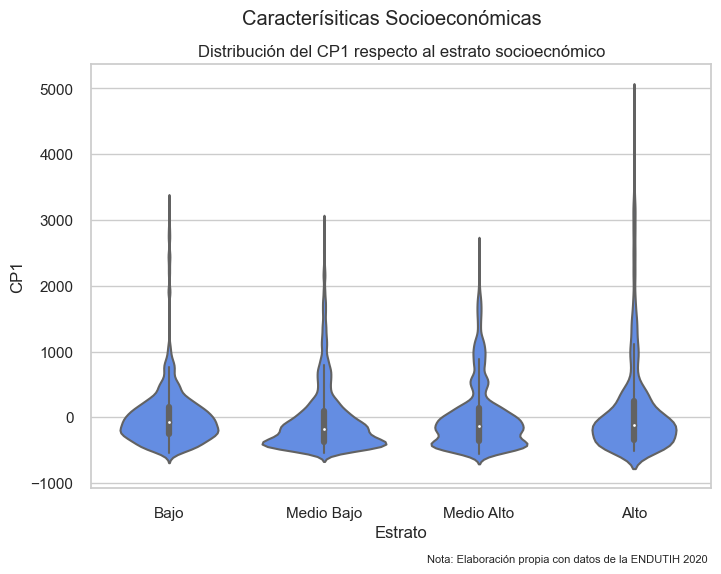

In [60]:
sns.set_theme(style="whitegrid")
sns.violinplot(x=Xvivienda.ESTRATO, y= Xviv_redux[:,0], color="#4F86F7")
plt.suptitle("Caracterísiticas Socioeconómicas")
plt.title("Distribución del CP1 respecto al estrato socioecnómico")
plt.ylabel("CP1")
plt.xlabel("Estrato")
plt.xticks(np.arange(4), ["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
plt.text(1.665, -2200, "Nota: Elaboración propia con datos de la ENDUTIH 2020", size=8)
plt.show()

## Métodos agrupamiento

### K Means

#### Selección de K

**Codo**

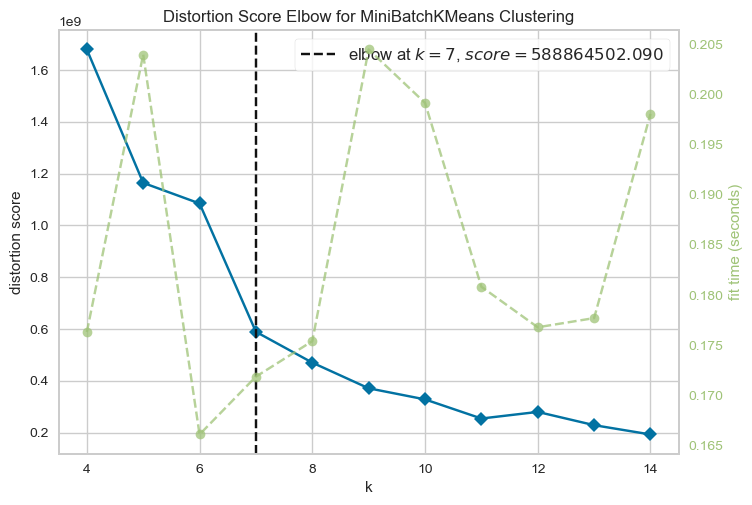

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
Evisualizer = KElbowVisualizer(MiniBatchKMeans(random_state=39, ), k=(4,15))
Evisualizer.fit(Xvivienda)
Evisualizer.show()

**Silhouette**

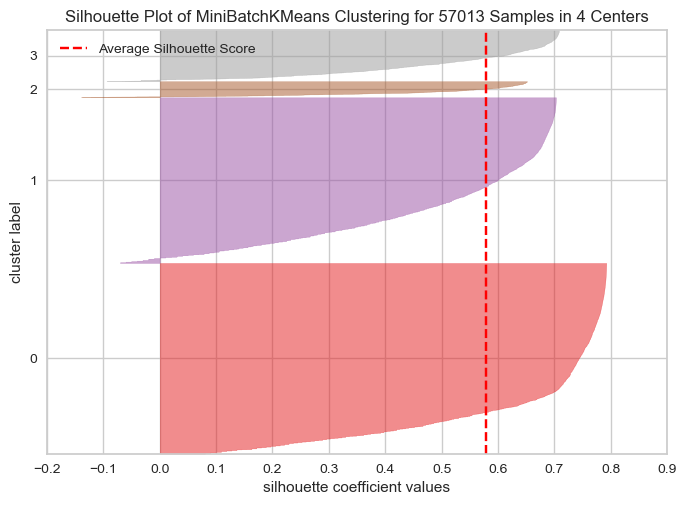

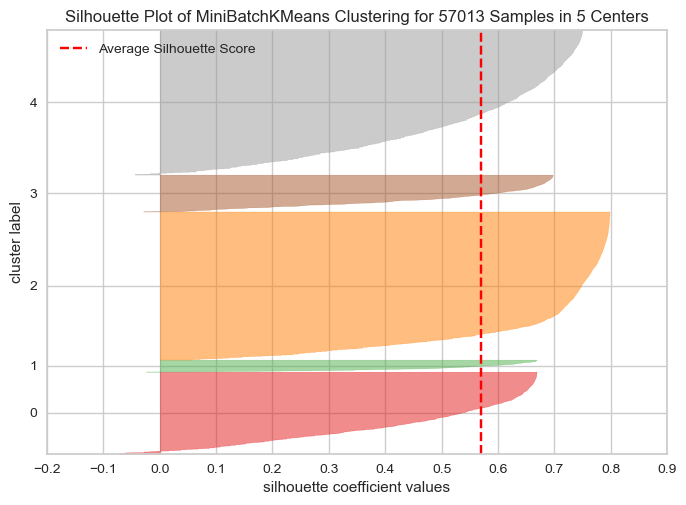

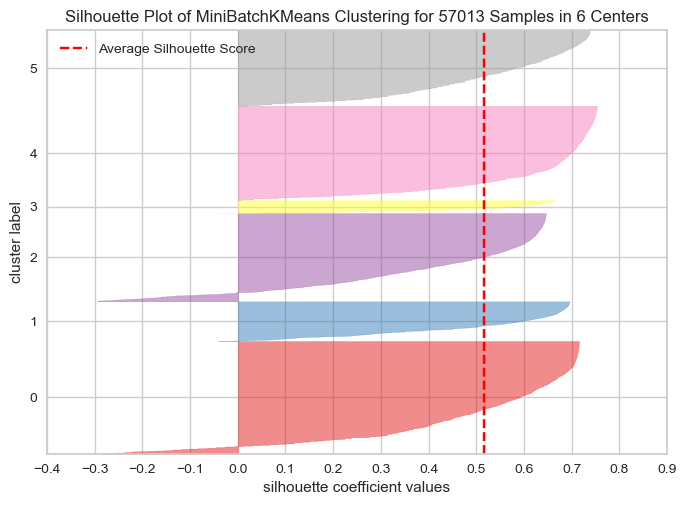

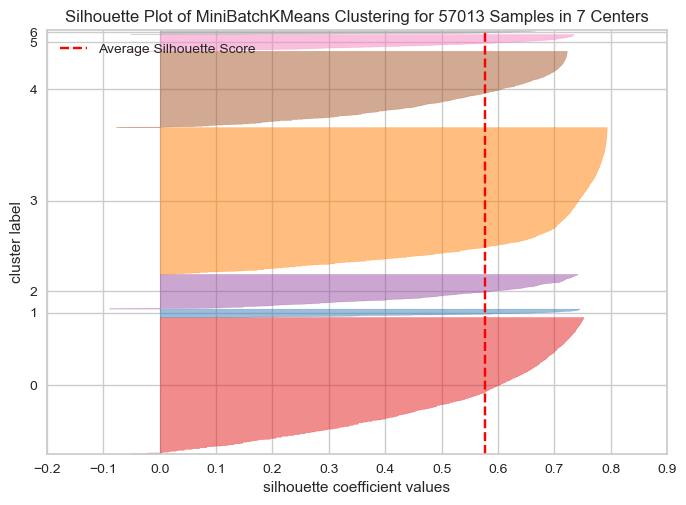

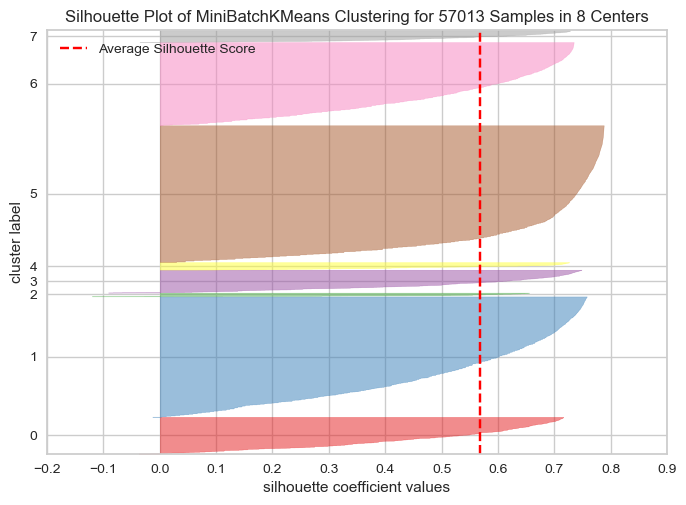

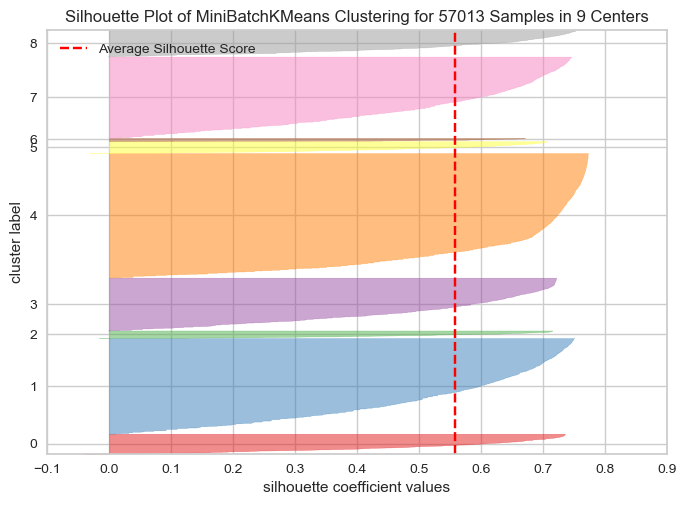

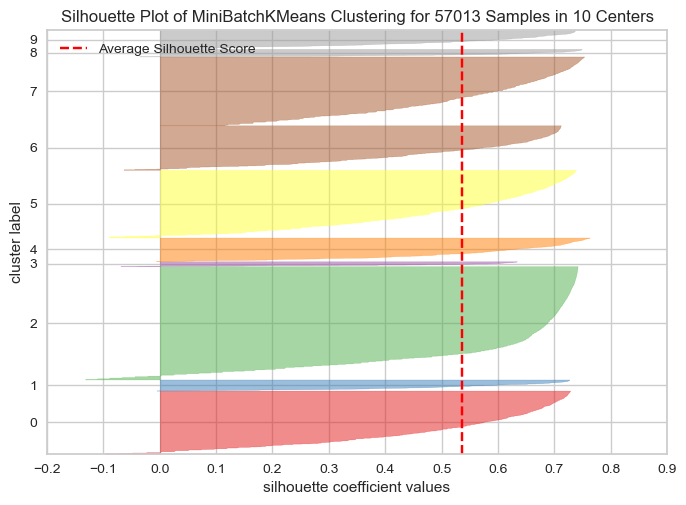

In [18]:
for k in range(4,11):
    svisualizer = SilhouetteVisualizer(MiniBatchKMeans(k, random_state=39))
    svisualizer.fit(Xvivienda)        
    svisualizer.show()
     

#### Modelo

In [61]:
kModel = MiniBatchKMeans(6, random_state=13)

In [62]:
kModel.fit(Xvivienda)

MiniBatchKMeans(n_clusters=6, random_state=13)

In [63]:
gruposkM = kModel.predict(Xvivienda)
gruposkM

array([5, 5, 5, ..., 0, 0, 0])

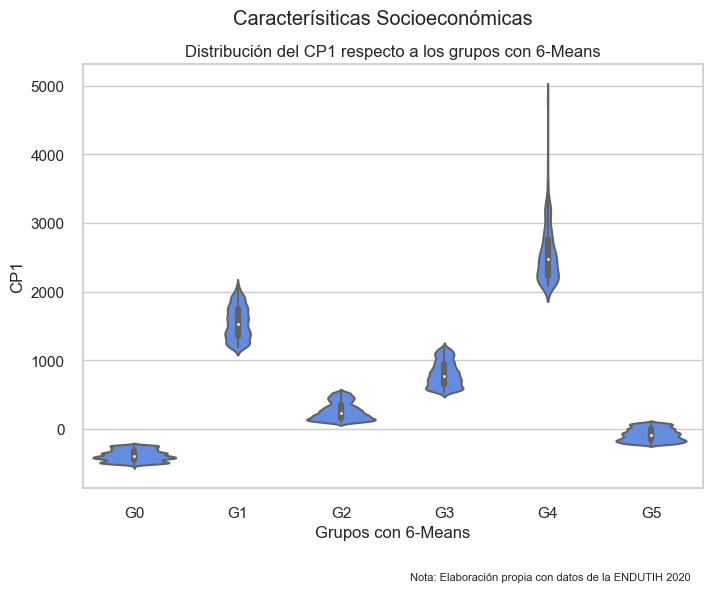

In [67]:
sns.set_theme(style="whitegrid")
sns.violinplot(x=gruposkM, y= Xviv_redux[:,0], color="#4F86F7")
plt.suptitle("Caracterísiticas Socioeconómicas")
plt.title("Distribución del CP1 respecto a los grupos con 6-Means")
plt.ylabel("CP1")
plt.xlabel("Grupos con 6-Means")
plt.xticks(np.arange(6), [f"G{i}" for i in range(6)])
plt.text(2.665, -2200, "Nota: Elaboración propia con datos de la ENDUTIH 2020", size=8)
plt.show()

#### Evaluacion

In [19]:
calinski_harabasz_score(Xvivienda,gruposkM)

216281.05152849664

In [20]:
davies_bouldin_score(Xvivienda,gruposkM)

0.512642749568606

In [21]:
silhouette_score(Xvivienda, gruposkM)

0.5705599460984417

### DBSCAN

In [19]:
dbModel =  DBSCAN(eps=0.5, min_samples=10, metric=distancia, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

In [20]:
gruposdb = dbModel.fit_predict(Xvivienda)
gruposdb

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

#### Evaluacion

In [21]:
calinski_harabasz_score(Xvivienda,gruposdb)

0.011120782835579206

In [22]:
davies_bouldin_score(Xvivienda,gruposdb)

20.480758488272716

In [23]:
silhouette_score(Xvivienda, gruposdb)

-0.38013753173449033

### Birch

#### Selección de K

**Codo**

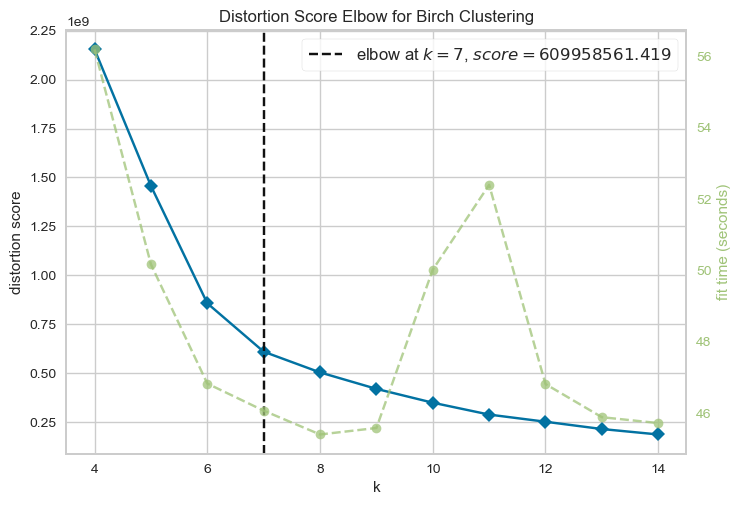

<AxesSubplot:title={'center':'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
Evisualizer = KElbowVisualizer(Birch(), k=(4,15))
Evisualizer.fit(Xvivienda)
Evisualizer.show()

**Silhouette**

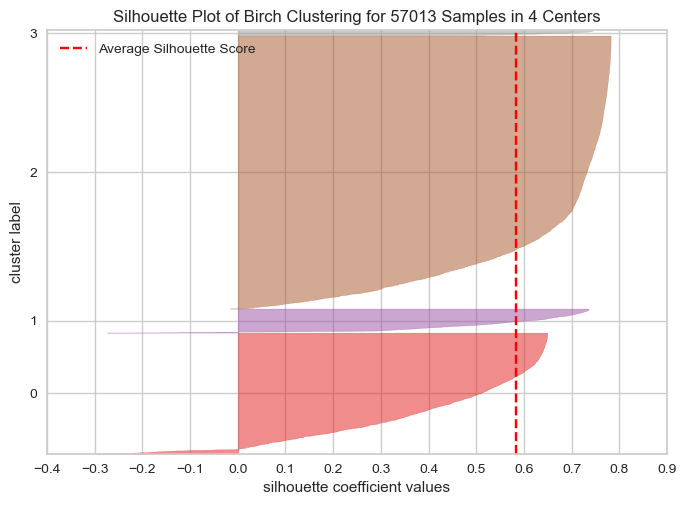

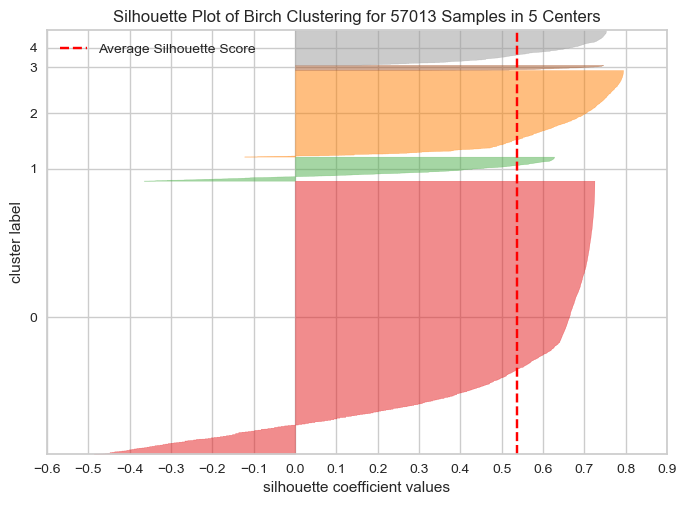

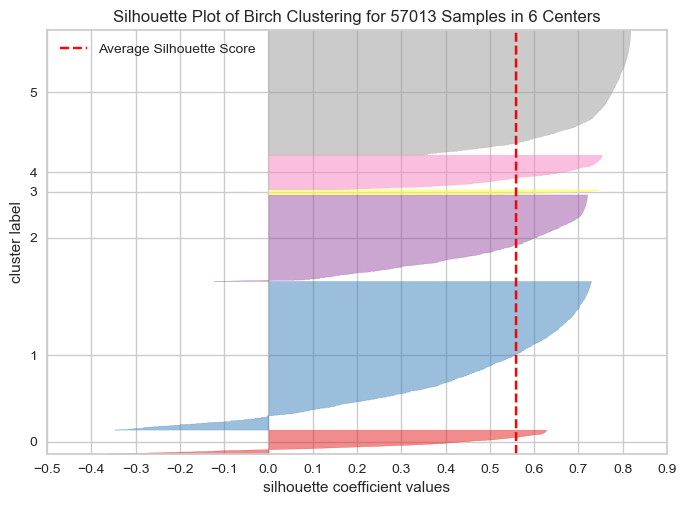

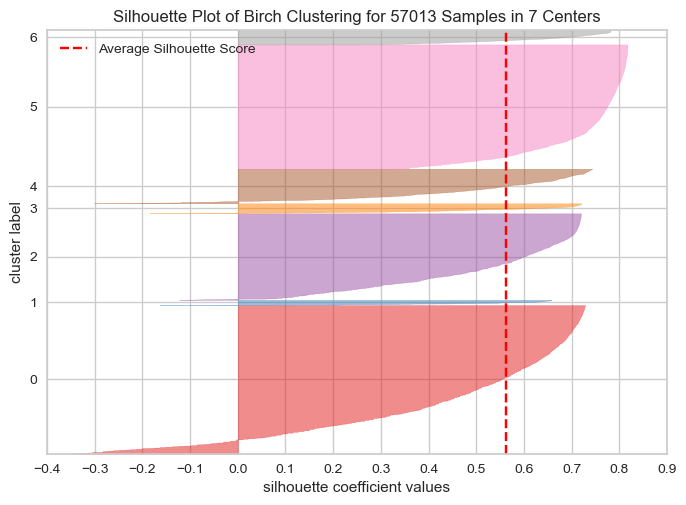

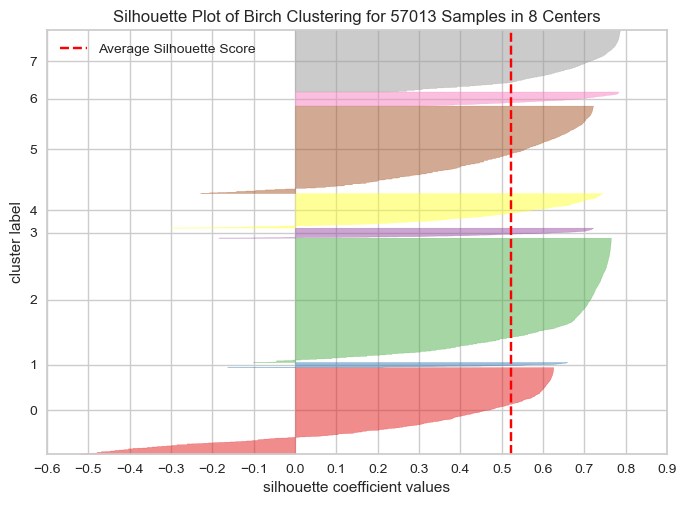

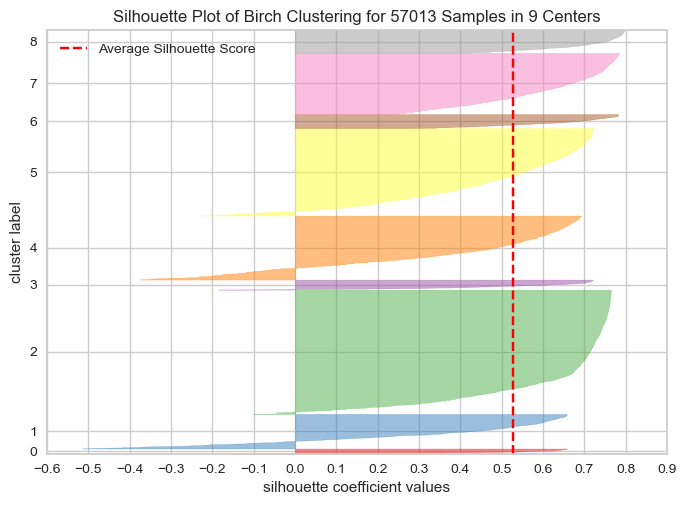

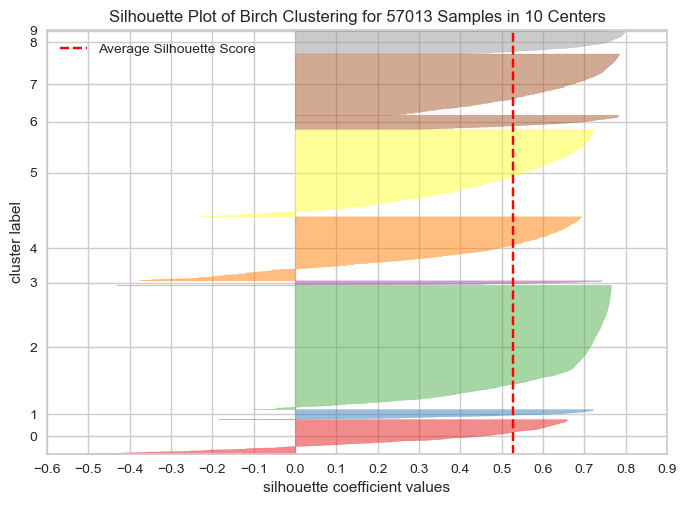

In [25]:
for k in range(4,11):
    svisualizer = SilhouetteVisualizer(Birch(n_clusters=k))
    svisualizer.fit(Xvivienda)        
    svisualizer.show()
     

#### Modelo

In [68]:
bModel = Birch(n_clusters=7)

In [69]:
with config_context(target_offload="gpu:0"):
    gruposbi = bModel.fit_predict(Xvivienda)

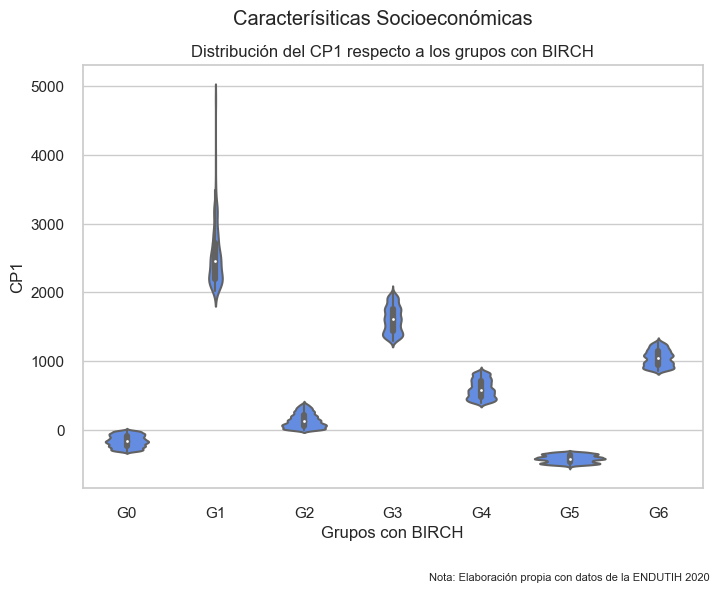

In [73]:
sns.set_theme(style="whitegrid")
sns.violinplot(x=gruposbi, y= Xviv_redux[:,0], color="#4F86F7")
plt.suptitle("Caracterísiticas Socioeconómicas")
plt.title("Distribución del CP1 respecto a los grupos con BIRCH")
plt.ylabel("CP1")
plt.xlabel("Grupos con BIRCH")
plt.xticks(np.arange(7), [f"G{i}" for i in range(7)])
plt.text(2.665+0.75, -2200, "Nota: Elaboración propia con datos de la ENDUTIH 2020", size=8)
plt.show()

#### Evaluacion

In [134]:
calinski_harabasz_score(Xvivienda,gruposbi)

239122.67051102984

In [135]:
davies_bouldin_score(Xvivienda,gruposbi)

0.5090765149635863

In [136]:
silhouette_score(Xvivienda, gruposbi)

0.5622966160156501

### OPTICS

#### Modelo

In [13]:
oModel = OPTICS(metric="euclidean", n_jobs=12)

In [14]:
gruposo = oModel.fit_predict(Xvivienda)

#### Evaluacion

In [15]:
calinski_harabasz_score(Xvivienda,gruposo)

63.84095632448907

In [16]:
davies_bouldin_score(Xvivienda,gruposo)

2.8923196634335744

In [17]:
silhouette_score(Xvivienda, gruposo)

-0.5128064902592123

# Características tecnológicas 

In [15]:
endutih_hogar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58154 entries, 0 to 58153
Data columns (total 84 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UPM       58154 non-null  int64  
 1   VIV_SEL   58154 non-null  int64  
 2   HOGAR     58154 non-null  int64  
 3   P4_1_1    58154 non-null  int64  
 4   P4_1_2    58154 non-null  int64  
 5   P4_1_3    58154 non-null  int64  
 6   P4_1_4    58154 non-null  int64  
 7   P4_1_5    58154 non-null  int64  
 8   P4_1_6    58154 non-null  int64  
 9   P4_1_6_1  53467 non-null  float64
 10  P4_1_6_2  53467 non-null  float64
 11  P4_2_1    58154 non-null  int64  
 12  P4_2_2    58154 non-null  int64  
 13  P4_2_3    58154 non-null  int64  
 14  P4_3      32989 non-null  float64
 15  P4_3A     327 non-null    object 
 16  P4_4      58154 non-null  int64  
 17  P4_5      34004 non-null  float64
 18  P4_6_1    31895 non-null  float64
 19  P4_6_2    31895 non-null  float64
 20  P4_6_3    31895 non-null  fl

In [74]:
Xhogar = endutih_hogar.drop(["UPM", "VIV_SEL", "UPM_DIS", "EST_DIS", "ENT", "HOGAR"], axis=1).copy() #ids
Xhogar["DOMINIO"] = endutih_hogar.DOMINIO.apply(lambda x: x=="U").astype('int')
Xhogar = Xhogar.drop(["P4_3A", "P4_6A", "P4_7A", "P4_8A", "P5_4A"], axis=1) #Preguntas tipo especifique
Xhogar = Xhogar.drop(["P5_8_1", "P5_9_1", "P5_10_1", "P5_9_3", "P5_10_3", "P5_10_4", "P5_9_5", "P5_10_5", "P5_9_6", "P5_9_7", "P5_9_8"], axis=1) #Muy pocas respuestas
Xhogar = Xhogar.fillna(0)
Xhogar

P4_1_1  P4_1_2  P4_1_3  P4_1_4  P4_1_5  P4_1_6  P4_1_6_1  P4_1_6_2  \
0           1       2       2       1       1       1       2.0       2.0   
1           1       2       2       1       2       1       3.0       1.0   
2           1       1       1       1       1       1       3.0       3.0   
3           1       1       2       1       2       1       6.0       5.0   
4           1       1       2       1       2       1       3.0       2.0   
...       ...     ...     ...     ...     ...     ...       ...       ...   
58149       2       2       2       1       2       1       2.0       2.0   
58150       2       2       2       1       2       1       2.0       2.0   
58151       1       1       2       1       2       1       4.0       2.0   
58152       1       1       1       1       2       1       4.0       4.0   
58153       1       1       1       2       2       1       4.0       2.0   

       P4_2_1  P4_2_2  P4_2_3  P4_3  P4_4  P4_5  P4_6_1  P4_6_2  P4_6_3  \
0           2       1       2   0.0     1   1.0     1.0     2.0     2.0   
1           2       2       2   1.0     1   1.0     2.0     2.0     1.0   
2           1       2       1   0.0     1   1.0     2.0     1.0     2.0   
3           1       1       2   0.0     1   2.0     0.0     0.0     0.0   
4           2       2       2   1.0     2   0.0     0.0     0.0     0.0   
...       ...     ...     ...   ...   ...   ...     ...     ...     ...   
58149       2       1       2   0.0     1   1.0     2.0     1.0     2.0   
58150       2       2       2   2.0     1   2.0     0.0     0.0     0.0   
58151       2       1       2   0.0     1   1.0     2.0     2.0     1.0   
58152       1       2       1   0.0     1   1.0     2.0     2.0     1.0   
58153       2       2       2   1.0     2   0.0     0.0     0.0     0.0   

       P4_6_4  P4_6_5  P4_6_6  P4_7_1  P4_7_2  P4_7_3  P4_7_4  P4_8  P5_1  \
0         2.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0     2   
1         2.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0     1   
2         2.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0     1   
3         0.0     0.0     0.0     2.0     1.0     2.0     2.0   0.0     2   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0   1.0     2   
...       ...     ...     ...     ...     ...     ...     ...   ...   ...   
58149     2.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0     1   
58150     0.0     0.0     0.0     1.0     2.0     2.0     2.0   0.0     2   
58151     2.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0     2   
58152     2.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0     2   
58153     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1.0     1   

       P5_2_1  P5_2_2  P5_3_1  P5_3_2  P5_4  P5_5  P5_6_1  P5_6_2  P5_6_3  \
0         0.0     0.0     0.0     0.0   1.0     1       1       2       1   
1         2.0     1.0     2.0     2.0   0.0     2       1       1       2   
2         1.0     2.0     2.0     2.0   0.0     1       1       1       1   
3         0.0     0.0     0.0     0.0   1.0     2       2       2       2   
4         0.0     0.0     0.0     0.0   1.0     2       2       2       2   
...       ...     ...     ...     ...   ...   ...     ...     ...     ...   
58149     1.0     2.0     1.0     2.0   0.0     2       1       1       2   
58150     0.0     0.0     0.0     0.0   1.0     2       2       2       2   
58151     0.0     0.0     0.0     0.0   1.0     2       1       2       2   
58152     0.0     0.0     0.0     0.0   1.0     2       1       2       2   
58153     2.0     1.0     2.0     2.0   0.0     2       2       1       2   

       P5_6_4  P5_6_5  P5_7_1  P5_7_2  P5_8_2  P5_9_2  P5_10_2  P5_7_3  \
0           1       2     2.0     2.0     0.0     0.0      0.0     2.0   
1           1       2     2.0     2.0     0.0     0.0      0.0     2.0   
2           1       2     2.0     1.0   560.0     0.0      0.0     2.0   
3           1       2     2.0     2

In [75]:
Xhogar.dtypes

P4_1_1       int64
P4_1_2       int64
P4_1_3       int64
P4_1_4       int64
P4_1_5       int64
            ...   
P5_11_3    float64
FAC_HOG      int64
DOMINIO      int32
TLOC         int64
ESTRATO      int64
Length: 62, dtype: object

## PCA

In [76]:
pca = PCA()

In [77]:
pca.fit(Xhogar)

PCA()

In [78]:
Xhog_redux = pca.transform(Xhogar)

In [79]:
np.round(pca.explained_variance_ratio_*100, decimals=3)

array([25.002, 19.82 , 15.685, 13.58 , 10.698,  7.394,  6.832,  0.987,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

In [31]:
Xhog_redux

array([[-4.68036942e+01, -2.01243673e+02, -1.78700467e+02, ...,
        -2.41761299e-12, -1.57562961e-12, -9.59250555e-13],
       [-2.23380917e+02, -6.63009431e+00, -1.81476820e+02, ...,
         1.56999040e-12,  2.79204533e-12,  4.71634309e-12],
       [-2.63701054e+02, -1.93595097e+00,  3.83169095e+02, ...,
        -2.56775643e-13, -1.05055191e-13, -3.97781325e-14],
       ...,
       [-1.09657313e+02,  2.05304049e+02, -1.70769671e+02, ...,
        -2.03703658e-13,  1.34063128e-14,  8.55133831e-13],
       [-1.09657082e+02,  2.05304090e+02, -1.70769323e+02, ...,
         2.67760265e-12,  2.27883027e-12,  3.12159862e-12],
       [-4.34719060e+01, -5.29603207e+01, -1.48536980e+02, ...,
         2.19651623e-12,  2.18290663e-12,  3.14049001e-12]])

## Base 

#### Evaluacion Agrupamiento por Estrato Socioeconómico

In [32]:
eval_cluster(Xhogar.drop("ESTRATO", axis=1), Xhogar.ESTRATO)

{'calinski': 114.68353269552631,
 'davies': 10.678806353393263,
 'silhoutte': -0.16299748253973334}

## Métodos agrupamiento

### K Means

#### Selección de K

**Codo**

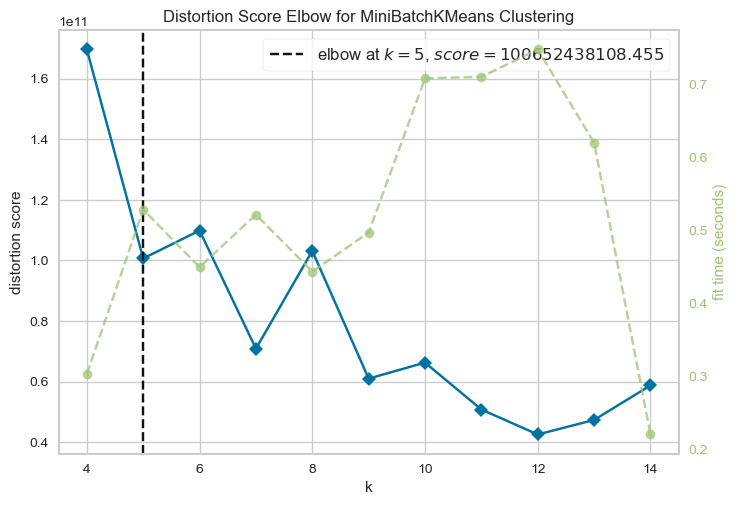

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
Evisualizer = KElbowVisualizer(MiniBatchKMeans(random_state=39, ), k=(4,15))
Evisualizer.fit(Xhogar)
Evisualizer.show()

**Silhouette**

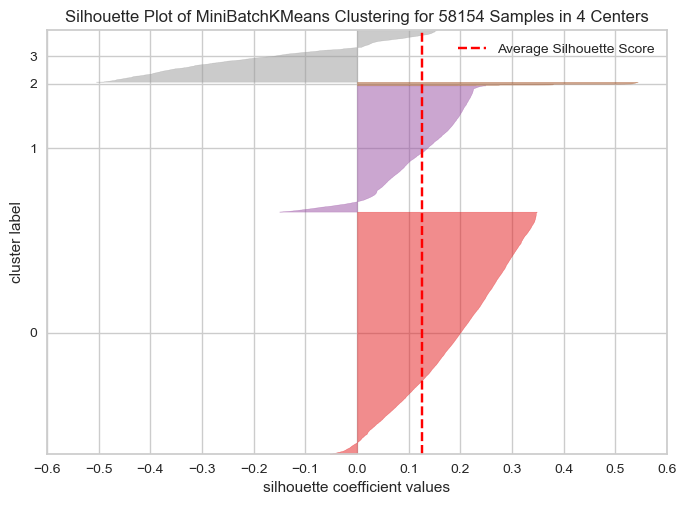

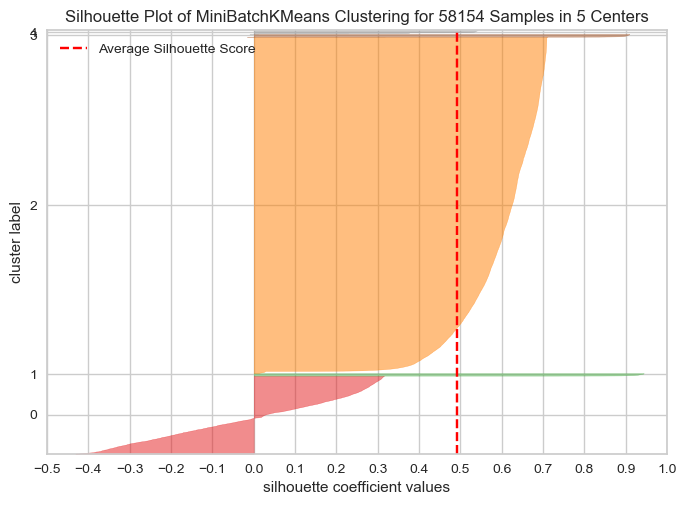

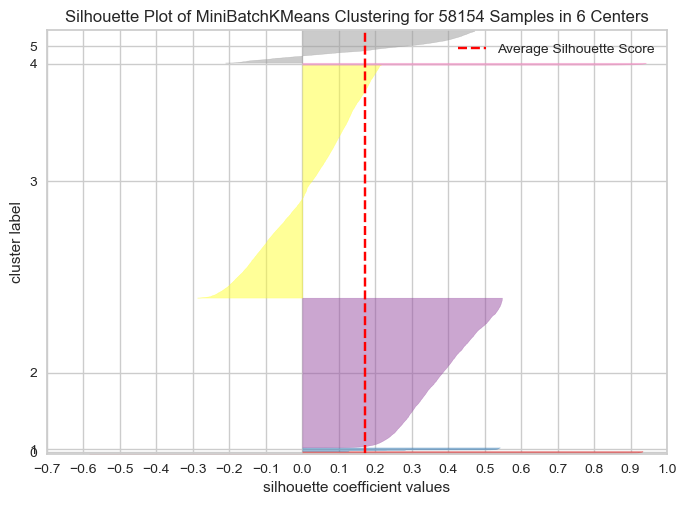

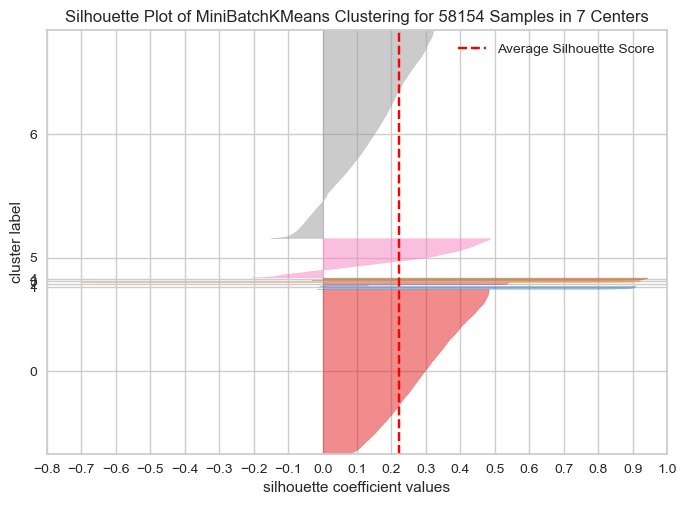

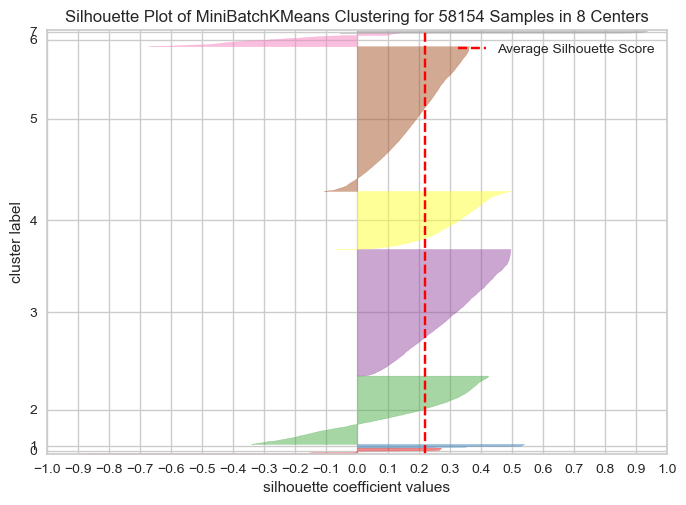

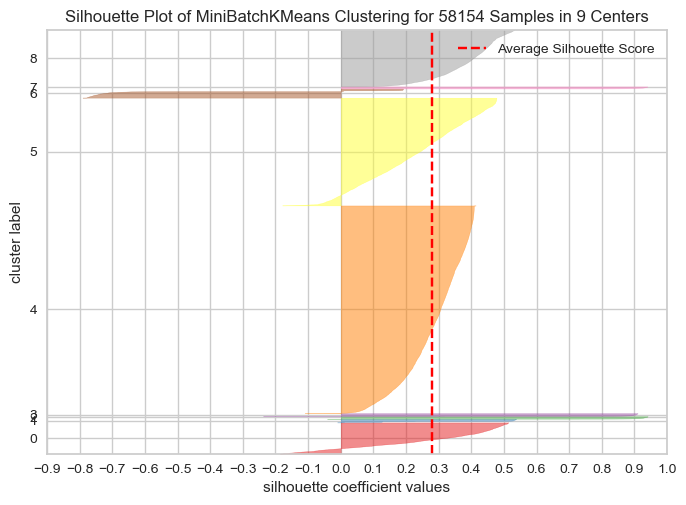

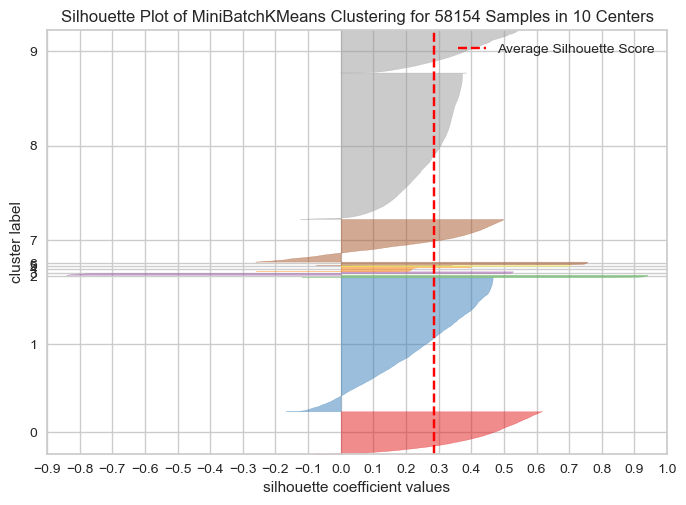

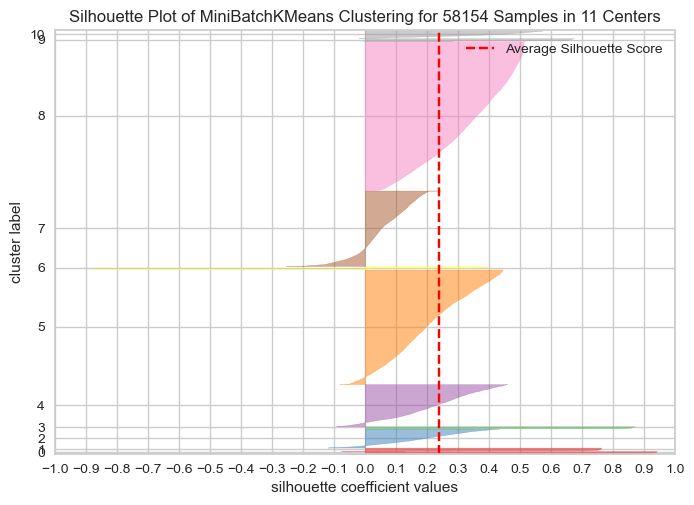

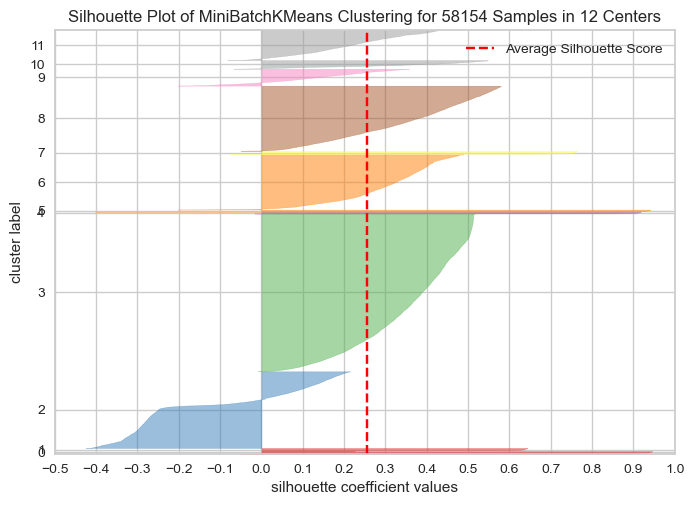

In [34]:
for k in range(4,13):
    svisualizer = SilhouetteVisualizer(MiniBatchKMeans(k, random_state=39))
    svisualizer.fit(Xhogar)        
    svisualizer.show()
     

#### Modelo

In [35]:
kModel = MiniBatchKMeans(5, random_state=13)

In [36]:
kModel.fit(Xhogar)

MiniBatchKMeans(n_clusters=5, random_state=13)

In [37]:
gruposkM = kModel.predict(Xhogar)
gruposkM

array([0, 0, 0, ..., 0, 0, 0])

#### Evaluacion

In [38]:
eval_cluster(Xhogar,gruposkM)

{'calinski': 10592.50344975701,
 'davies': 1.2345281413617264,
 'silhoutte': 0.5355515350795805}

### DBSCAN

In [39]:
dbModel =  DBSCAN(eps=0.5, min_samples=5, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

In [40]:
gruposdb = dbModel.fit_predict(Xhogar)
gruposdb

array([-1, -1, -1, ..., -1, -1, -1])

In [41]:
np.unique(gruposdb)

array([-1,  0,  1,  2,  3,  4,  5])

#### Evaluacion

In [42]:
eval_cluster(Xhogar, gruposdb)

{'calinski': 0.16671053091147217,
 'davies': 2.721666700379239,
 'silhoutte': -0.6250491418757517}

### Birch

#### Modelo

In [43]:
bModel = Birch(n_clusters=5)

In [44]:
with config_context(target_offload="gpu:0"):
    gruposbi = bModel.fit_predict(Xhogar)

#### Evaluacion

In [45]:
eval_cluster(Xhogar, gruposbi)

{'calinski': 24126.77431319379,
 'davies': 0.8267133719690601,
 'silhoutte': 0.9072463677776968}

### OPTICS

#### Modelo

In [46]:
oModel = OPTICS(metric="euclidean", n_jobs=12)

In [47]:
with config_context(target_offload="gpu:0"):
    gruposo = oModel.fit_predict(Xhogar)

#### Evaluacion

In [48]:
eval_cluster(Xhogar,gruposo)

{'calinski': 32.00305700750562,
 'davies': 1.6009290204412732,
 'silhoutte': -0.24789536668925213}

# Características tecnológicas y socioeconómicas solas

In [8]:
endutih_vivienda_hogar =  pd.merge(left=endutih_vivienda.drop(["UPM_DIS", "EST_DIS", "ENT", "DOMINIO", "TLOC", "ESTRATO"], axis=1).copy(), right=endutih_hogar,
         on=["VIV_SEL","UPM"])

In [9]:
Xvivhog = endutih_vivienda_hogar.drop(["UPM", "VIV_SEL", "UPM_DIS", "EST_DIS", "ENT", "HOGAR"], axis=1).copy() #ids
Xvivhog["DOMINIO"] = endutih_vivienda_hogar.DOMINIO.apply(lambda x: x=="U").astype('int')
Xvivhog = Xvivhog.drop(["P4_3A", "P4_6A", "P4_7A", "P4_8A", "P5_4A"], axis=1) #Preguntas tipo especifique
Xvivhog = Xvivhog.drop(["P5_8_1", "P5_9_1", "P5_10_1", "P5_9_3", "P5_10_3", "P5_10_4", "P5_9_5", "P5_10_5", "P5_9_6", "P5_9_7", "P5_9_8"], axis=1) #Muy pocas respuestas
Xvivhog = Xvivhog.fillna(0)
Xvivhog

P1_1  P1_2  P1_3  P1_4  P1_5_1  P1_5_2  P1_5_3  P2_1  P2_2  P2_3  ...  \
0         2     2     1     1       1       2       1     4     1   0.0  ...   
1         3     1     1     1       1       1       1     1     1   0.0  ...   
2         2     1     1     1       1       1       1     5     1   0.0  ...   
3         2     1     1     1       1       1       1     6     1   0.0  ...   
4         3     1     1     1       1       1       1     4     1   0.0  ...   
...     ...   ...   ...   ...     ...     ...     ...   ...   ...   ...  ...   
58149     2     1     1     1       1       1       1     7     1   0.0  ...   
58150     2     1     1     1       1       1       1     6     2   2.0  ...   
58151     2     1     1     1       1       1       1     6     2   2.0  ...   
58152     3     1     1     1       1       1       1     6     1   0.0  ...   
58153     2     1     1     1       1       1       2     2     1   0.0  ...   

       P5_8_7  P5_7_8  P5_8_8  P5_11_1  P5_11_2  P5_11_3  FAC_HOG  DOMINIO  \
0         0.0     2.0     0.0      3.0      3.0      3.0      596        1   
1         0.0     2.0     0.0      1.0      1.0      3.0      596        1   
2         0.0     2.0     0.0      1.0      3.0      1.0      596        1   
3         0.0     2.0     0.0      1.0      1.0      1.0      692        1   
4         0.0     2.0     0.0      1.0      1.0      1.0      692        1   
...       ...     ...     ...      ...      ...      ...      ...      ...   
58149   300.0     2.0     0.0      3.0      3.0      1.0      199        0   
58150    20.0     1.0   200.0      1.0      3.0      1.0      199        0   
58151     0.0     1.0   300.0      1.0      1.0      3.0      199        0   
58152     0.0     1.0     0.0      1.0      3.0      3.0      199        0   
58153   610.0     2.0     0.0      3.0      1.0      1.0      199        0   

       TLOC  ESTRATO  
0         1        3  
1         1        3  
2         1        3  
3         1        4  
4         1        4  
...     ...      ...  
58149     4        2  
58150     4        2  
58151     4        2  
58152     4        2  
58153     4        2  

[58154 rows x 73 columns]

## PCA

In [10]:
pca = PCA()

In [11]:
pca.fit(Xvivhog)

PCA()

In [12]:
Xvivhog_redux = pca.transform(Xvivhog)

In [13]:
np.round(pca.explained_variance_ratio_*100, decimals=3)

array([23.4  , 18.551, 14.905, 13.066, 12.247, 10.003,  6.903,  0.924,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ])

In [14]:
Xvivhog_redux

array([[-2.22865877e+02, -9.06040387e+00, -1.51448349e+02, ...,
        -9.66943853e-13, -5.01413102e-14,  1.11708819e-12],
       [-2.32446941e+02, -9.61725947e+00, -1.75433301e+02, ...,
        -5.64804277e-12, -5.40851661e-13,  6.54053420e-12],
       [-5.80806573e+01, -1.97622282e+02, -1.42900925e+02, ...,
        -4.48668287e-12, -2.40330904e-13,  5.00275245e-12],
       ...,
       [ 5.67156514e+01,  2.30308311e+02, -3.18342402e+02, ...,
        -4.77777577e-11, -4.91238990e-13,  3.89052361e-11],
       [-2.05442283e+02,  1.32079656e+01, -3.43934714e+02, ...,
        -7.78934576e-13,  1.35576208e-14,  8.11072404e-13],
       [ 1.00859673e+02, -1.25788761e+01, -3.16244430e+02, ...,
         2.03068591e-11,  1.92172868e-12, -2.38502144e-11]])

## Base 

#### Evaluacion Agrupamiento por Estrato Socioeconómico

In [15]:
eval_cluster(Xvivhog.drop("ESTRATO", axis=1), Xvivhog.ESTRATO)

{'calinski': 115.07794081625694,
 'davies': 10.937783296740392,
 'silhoutte': -0.14499578327894772}

## Métodos agrupamiento 

### K Means

#### Selección de K

**Codo**

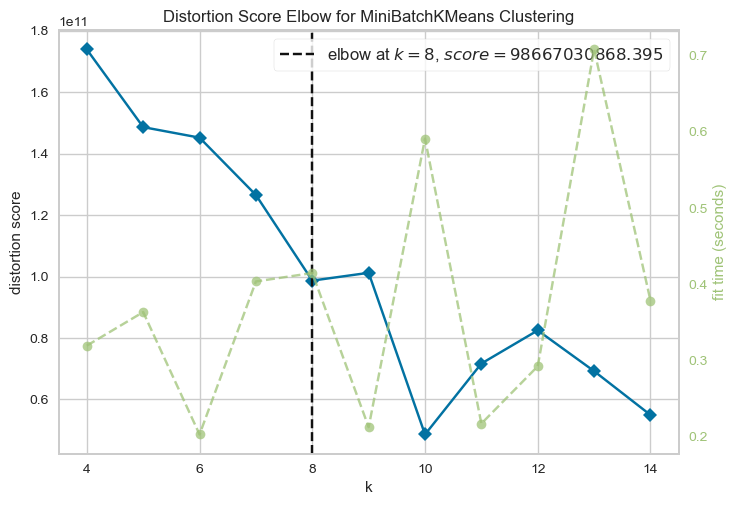

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
Evisualizer = KElbowVisualizer(MiniBatchKMeans(random_state=39, ), k=(4,15))
Evisualizer.fit(Xvivhog)
Evisualizer.show()

**Silhouette**

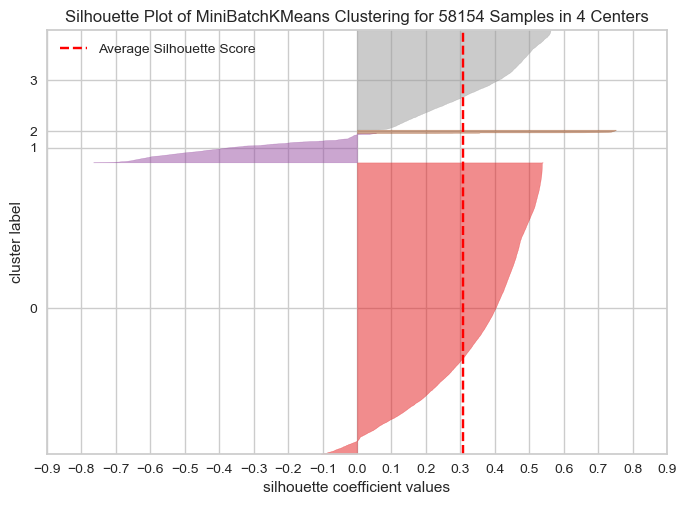

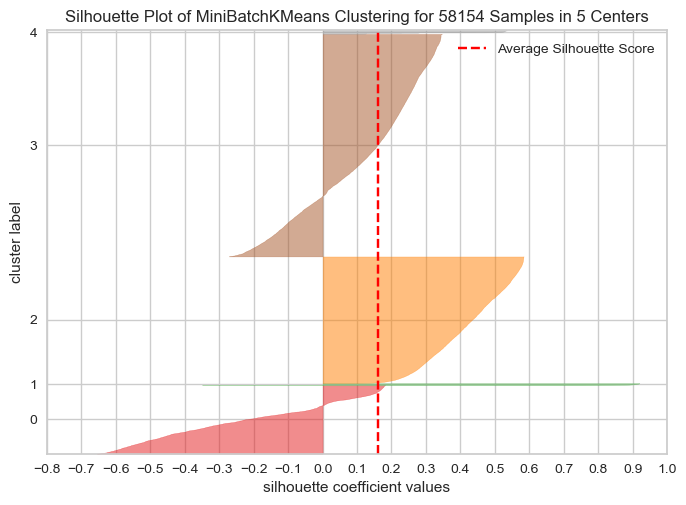

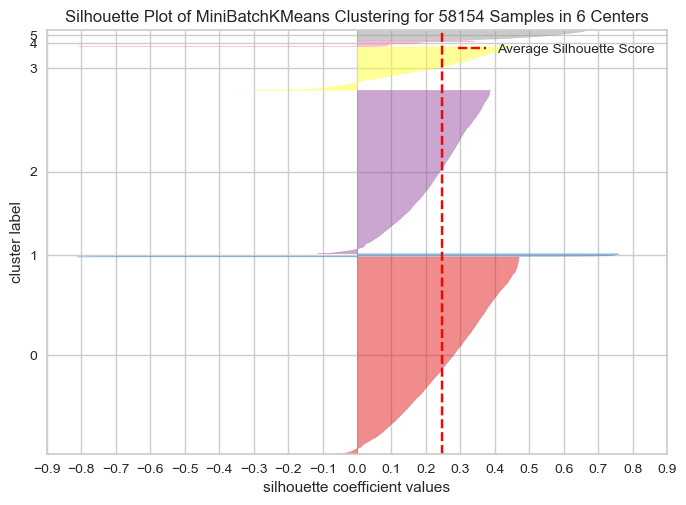

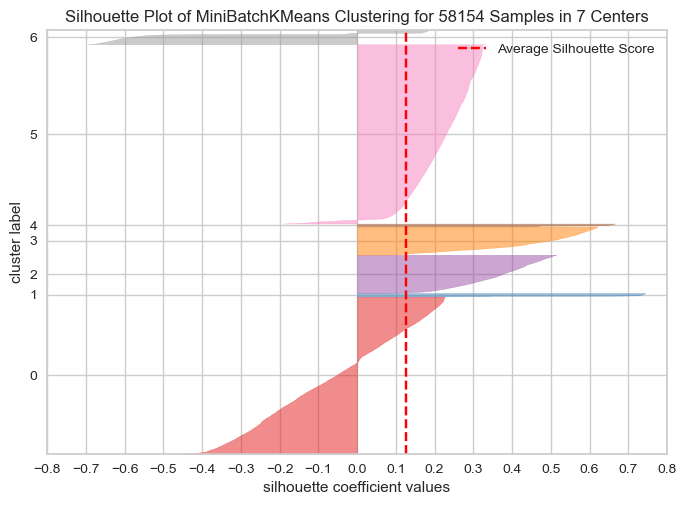

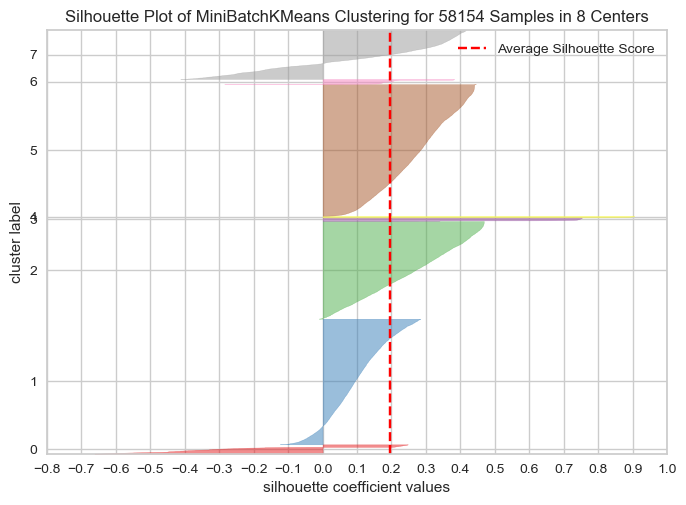

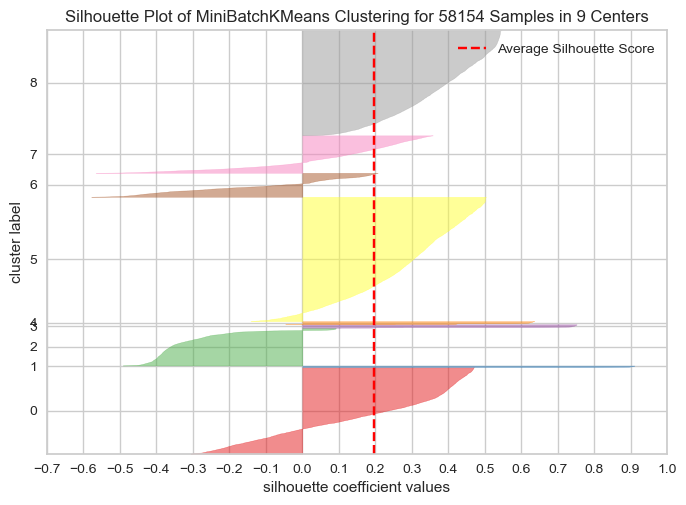

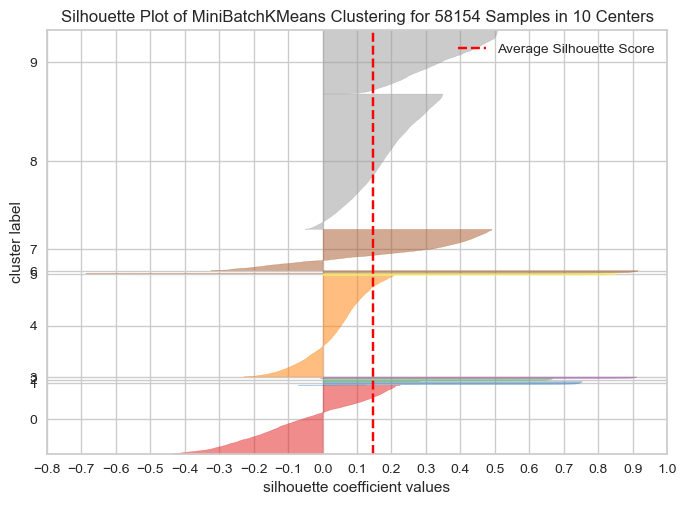

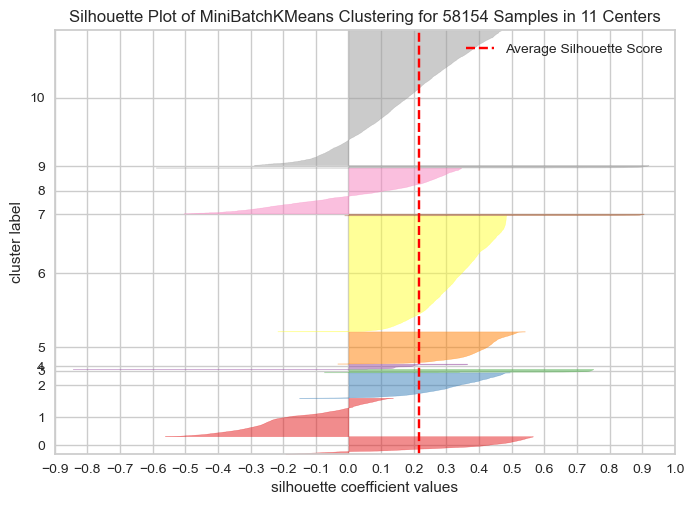

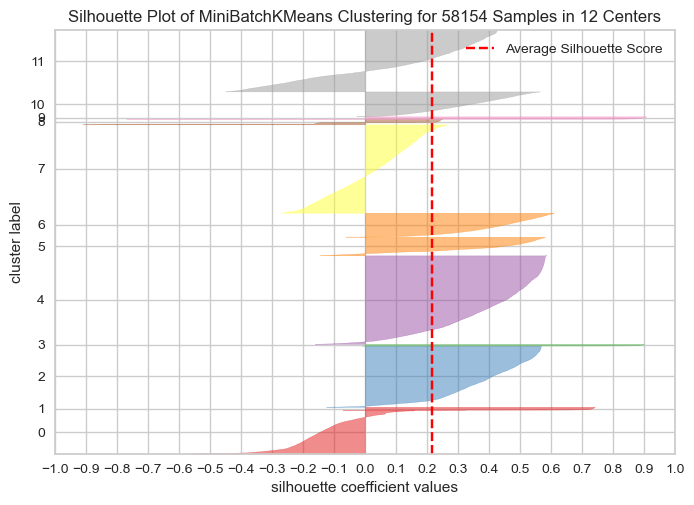

In [41]:
for k in range(4,13):
    svisualizer = SilhouetteVisualizer(MiniBatchKMeans(k, random_state=39))
    svisualizer.fit(Xvivhog)        
    svisualizer.show()
     

#### Modelo

In [45]:
kModel = MiniBatchKMeans(6, random_state=13)

In [46]:
kModel.fit(Xvivhog)

MiniBatchKMeans(n_clusters=6, random_state=13)

In [47]:
gruposkM = kModel.predict(Xvivhog)
gruposkM

array([0, 0, 0, ..., 3, 3, 3])

#### Evaluacion

In [48]:
eval_cluster(Xvivhog,gruposkM)

{'calinski': 9192.693087229018,
 'davies': 1.2668060187031025,
 'silhoutte': 0.3194622011981836}

### DBSCAN

In [55]:
dbModel =  DBSCAN(eps=0.1, min_samples=3, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

In [56]:
gruposdb = dbModel.fit_predict(Xvivhog)
gruposdb

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [57]:
np.unique(gruposdb)

array([-1], dtype=int64)

#### Evaluacion

In [ ]:
#eval_cluster(Xhogar, gruposdb)

### Birch


#### Modelo

In [16]:
bModel = Birch(n_clusters=6)

In [18]:
with config_context(target_offload="gpu:0"):
    gruposbi = bModel.fit_predict(Xvivhog)

#### Evaluacion

In [19]:
eval_cluster(Xvivhog, gruposbi)

{'calinski': 24182.160734045658,
 'davies': 0.7984399991948075,
 'silhoutte': 0.895864999057247}

### OPTICS

#### Modelo

In [20]:
oModel = OPTICS(metric="euclidean", n_jobs=12)

In [22]:
with config_context(target_offload="gpu:0"):
    gruposo = oModel.fit_predict(Xvivhog)

#### Evaluacion

In [24]:
eval_cluster(Xvivhog,gruposo)

{'calinski': 34.38755517699722,
 'davies': 1.5801244811650041,
 'silhoutte': -0.29071561217770875}

# Características tecnológicas y socioeconómicas dentro de los estratos socioeconómicos ya establecidos

In [13]:
endutih_vivienda_hogar =  pd.merge(left=endutih_vivienda.drop(["UPM_DIS", "EST_DIS", "ENT", "DOMINIO", "TLOC", "ESTRATO"], axis=1).copy(), right=endutih_hogar,
         on=["VIV_SEL","UPM"])

In [14]:
Xvivhog = endutih_vivienda_hogar.drop(["UPM", "VIV_SEL", "UPM_DIS", "EST_DIS", "ENT", "HOGAR"], axis=1).copy() #ids
Xvivhog["DOMINIO"] = endutih_vivienda_hogar.DOMINIO.apply(lambda x: x=="U").astype('int')
Xvivhog = Xvivhog.drop(["P4_3A", "P4_6A", "P4_7A", "P4_8A", "P5_4A"], axis=1) #Preguntas tipo especifique
Xvivhog = Xvivhog.drop(["P5_8_1", "P5_9_1", "P5_10_1", "P5_9_3", "P5_10_3", "P5_10_4", "P5_9_5", "P5_10_5", "P5_9_6", "P5_9_7", "P5_9_8"], axis=1) #Muy pocas respuestas
Xvivhog = Xvivhog.fillna(0)
Xvivhog

P1_1  P1_2  P1_3  P1_4  P1_5_1  P1_5_2  P1_5_3  P2_1  P2_2  P2_3  \
0         2     2     1     1       1       2       1     4     1   1.0   
1         3     1     1     1       1       1       1     1     1   1.0   
2         2     1     1     1       1       1       1     5     1   1.0   
3         2     1     1     1       1       1       1     6     1   1.0   
4         3     1     1     1       1       1       1     4     1   1.0   
...     ...   ...   ...   ...     ...     ...     ...   ...   ...   ...   
58149     2     1     1     1       1       1       1     7     1   1.0   
58150     2     1     1     1       1       1       1     6     2   2.0   
58151     2     1     1     1       1       1       1     6     2   2.0   
58152     3     1     1     1       1       1       1     6     1   1.0   
58153     2     1     1     1       1       1       2     2     1   1.0   

       FAC_VIV  P4_1_1  P4_1_2  P4_1_3  P4_1_4  P4_1_5  P4_1_6  P4_1_6_1  \
0          596       2       2       2       1       2       1       2.0   
1          596       1       2       2       1       2       1       1.0   
2          596       2       2       1       1       2       1       5.0   
3          692       2       2       2       1       2       1       4.0   
4          692       2       2       2       1       2       1       4.0   
...        ...     ...     ...     ...     ...     ...     ...       ...   
58149      199       1       1       2       1       2       1       1.0   
58150      199       2       2       2       1       2       1       1.0   
58151      199       2       2       1       1       2       1       2.0   
58152      199       1       2       2       1       2       1       1.0   
58153      199       2       1       2       2       2       2       0.0   

       P4_1_6_2  P4_2_1  P4_2_2  P4_2_3  P4_3  P4_4  P4_5  P4_6_1  P4_6_2  \
0           2.0       2       1       2   0.0     2   0.0     0.0     0.0   
1           1.0       2       2       2   2.0     1   1.0     2.0     1.0   
2           5.0       1       2       2   0.0     1   3.0     1.0     2.0   
3           4.0       2       2       2   2.0     1   3.0     2.0     1.0   
4           4.0       1       2       2   0.0     1   3.0     2.0     1.0   
...         ...     ...     ...     ...   ...   ...   ...     ...     ...   
58149       0.0       2       2       2   1.0     2   0.0     0.0     0.0   
58150       1.0       2       2       1   0.0     1   1.0     2.0     2.0   
58151       2.0       2       2       2   2.0     1   1.0     2.0     1.0   
58152       1.0       2       2       2   1.0     1   1.0     2.0     2.0   
58153       0.0       2       2       2   2.0     2   0.0     0.0     0.0   

       P4_6_3  P4_6_4  P4_6_5  P4_6_6  P4_7_1  P4_7_2  P4_7_3  P4_7_4  P4_8  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1.0   
1         2.0     2.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0   
2         2.0     2.0     2.0     2.0     1.0     2.0     2.0     2.0   0.0   
3         2.0     2.0     2.0     2.0     1.0     2.0     2.0     2.0   0.0   
4         2.0     2.0     2.0     2.0     1.0     2.0     2.0     2.0   0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...   ...   
58149     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1.0   
58150     1.0     1.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0   
58151     2.0     2.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0   
58152     1.0     2.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0   
58153     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1.0   

       P5_1  P5_2_1  P5_2_2  P5_3_1  P5_3_2  P5_4  P5_5  P5_6_1  P5_6_2  \
0         2     0.0     0.0     0.0     0.0   2.0     2       2       2   
1         1     1.0     2.0     2.0     2.0   0.0     2       1       1   
2         2     0.0     0.0     0.0     0.0   2.0     1       1       2   
3         1     1.0

## PCA

In [18]:
pca = PCA()

In [19]:
pca.fit(Xvivhog)

PCA()

In [20]:
Xvivhog_redux = pca.transform(Xvivhog)

In [21]:
np.round(pca.explained_variance_ratio_*100, decimals=3)

array([23.4  , 18.551, 14.905, 13.066, 12.247, 10.003,  6.903,  0.924,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ])

In [22]:
Xvivhog_redux

array([[-2.22865877e+02, -9.06040387e+00, -1.51448349e+02, ...,
        -9.66943853e-13, -5.01413102e-14,  1.11708819e-12],
       [-2.32446941e+02, -9.61725947e+00, -1.75433301e+02, ...,
        -5.64804277e-12, -5.40851661e-13,  6.54053420e-12],
       [-5.80806573e+01, -1.97622282e+02, -1.42900925e+02, ...,
        -4.48668287e-12, -2.40330904e-13,  5.00275245e-12],
       ...,
       [ 5.67156514e+01,  2.30308311e+02, -3.18342402e+02, ...,
        -4.77777577e-11, -4.91238990e-13,  3.89052361e-11],
       [-2.05442283e+02,  1.32079656e+01, -3.43934714e+02, ...,
        -7.78934576e-13,  1.35576208e-14,  8.11072404e-13],
       [ 1.00859673e+02, -1.25788761e+01, -3.16244430e+02, ...,
         2.03068591e-11,  1.92172868e-12, -2.38502144e-11]])

## Base 

#### Evaluacion Agrupamiento por Estrato Socioeconómico

In [15]:
eval_cluster(Xvivhog.drop("ESTRATO", axis=1), Xvivhog.ESTRATO)

{'calinski': 115.07794326403175,
 'davies': 10.937782427660418,
 'silhoutte': -0.14499582063510263}

## Bajo

In [16]:
Xvivhog_bajo = Xvivhog[Xvivhog.ESTRATO==1]
Xvivhog_bajo

P1_1  P1_2  P1_3  P1_4  P1_5_1  P1_5_2  P1_5_3  P2_1  P2_2  P2_3  \
556       2     1     1     1       1       2       2     2     1   1.0   
557       2     1     1     1       1       1       1     6     1   1.0   
558       2     1     1     1       1       2       2     6     1   1.0   
559       2     1     1     1       1       1       2     7     1   1.0   
560       2     1     1     1       1       1       1     6     1   1.0   
...     ...   ...   ...   ...     ...     ...     ...   ...   ...   ...   
58140     2     1     1     1       1       1       2     2     1   1.0   
58141     2     2     2     1       1       1       2     1     1   1.0   
58142     2     1     1     1       1       2       2     4     1   1.0   
58143     2     2     1     1       1       2       1     2     1   1.0   
58144     2     1     2     1       1       1       2     4     1   1.0   

       FAC_VIV  P4_1_1  P4_1_2  P4_1_3  P4_1_4  P4_1_5  P4_1_6  P4_1_6_1  \
556        572       2       1       1       2       2       1       2.0   
557        572       2       1       2       1       1       1       5.0   
558        572       2       2       2       2       2       1       5.0   
559        572       1       1       1       2       2       1       2.0   
560        572       1       1       2       1       1       1       6.0   
...        ...     ...     ...     ...     ...     ...     ...       ...   
58140      197       2       1       2       2       2       1       1.0   
58141      197       2       2       2       2       2       2       0.0   
58142      197       1       2       2       1       2       2       0.0   
58143      197       2       2       2       2       2       2       0.0   
58144      197       1       2       2       1       2       2       0.0   

       P4_1_6_2  P4_2_1  P4_2_2  P4_2_3  P4_3  P4_4  P4_5  P4_6_1  P4_6_2  \
556         2.0       2       2       2   1.0     2   0.0     0.0     0.0   
557         5.0       2       1       1   0.0     1   1.0     2.0     1.0   
558         5.0       2       2       2   1.0     1   1.0     2.0     2.0   
559         2.0       2       2       2   1.0     2   0.0     0.0     0.0   
560         6.0       1       1       1   0.0     1   1.0     2.0     1.0   
...         ...     ...     ...     ...   ...   ...   ...     ...     ...   
58140       1.0       2       1       2   0.0     1   1.0     2.0     2.0   
58141       0.0       2       2       2   3.0     2   0.0     0.0     0.0   
58142       0.0       2       2       2   1.0     2   0.0     0.0     0.0   
58143       0.0       2       2       2   3.0     2   0.0     0.0     0.0   
58144       0.0       2       2       2   1.0     2   0.0     0.0     0.0   

       P4_6_3  P4_6_4  P4_6_5  P4_6_6  P4_7_1  P4_7_2  P4_7_3  P4_7_4  P4_8  \
556       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1.0   
557       2.0     2.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0   
558       2.0     2.0     1.0     2.0     0.0     0.0     0.0     0.0   0.0   
559       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2.0   
560       2.0     2.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...   ...   
58140     1.0     2.0     2.0     2.0     0.0     0.0     0.0     0.0   0.0   
58141     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   4.0   
58142     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1.0   
58143     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1.0   
58144     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1.0   

       P5_1  P5_2_1  P5_2_2  P5_3_1  P5_3_2  P5_4  P5_5  P5_6_1  P5_6_2  \
556       2     0.0     0.0     0.0     0.0   1.0     2       2       2   
557       1     1.0     2.0     2.0     2.0   0.0     2       1       1   
558       2     0.0     0.0     0.0     0.0   1.0     1       1       2   
559       2     0.0

In [17]:
Xvivhog_bajo.describe()

P1_1          P1_2          P1_3          P1_4        P1_5_1  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean       2.013061      2.345237      2.111334      1.018358      1.273084   
std        0.460252      1.663757      1.167052      0.134248      0.445564   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      1.000000      1.000000      1.000000      1.000000   
50%        2.000000      2.000000      2.000000      1.000000      1.000000   
75%        2.000000      2.000000      2.000000      1.000000      2.000000   
max        3.000000      6.000000      5.000000      2.000000      2.000000   

             P1_5_2        P1_5_3          P2_1          P2_2          P2_3  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean       1.496484      1.734314      3.951137      1.030505      1.044205   
std        0.500010      0.441718      2.071230      0.171980      0.287767   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      2.000000      1.000000      1.000000   
50%        1.000000      2.000000      4.000000      1.000000      1.000000   
75%        2.000000      2.000000      5.000000      1.000000      1.000000   
max        2.000000      2.000000     20.000000      2.000000      5.000000   

            FAC_VIV        P4_1_1        P4_1_2        P4_1_3        P4_1_4  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean     637.471824      1.606905      1.735318      1.916157      1.383140   
std      485.319288      0.488460      0.441184      0.277165      0.486174   
min       74.000000      1.000000      1.000000      1.000000      1.000000   
25%      356.000000      1.000000      1.000000      2.000000      1.000000   
50%      547.000000      2.000000      2.000000      2.000000      1.000000   
75%      767.000000      2.000000      2.000000      2.000000      2.000000   
max     3847.000000      2.000000      2.000000      2.000000      2.000000   

             P4_1_5        P4_1_6      P4_1_6_1      P4_1_6_2        P4_2_1  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean       1.976984      1.185770      1.658508      1.415472      1.972966   
std        0.149960      0.388939      1.292108      1.587913      0.162191   
min        1.000000      1.000000      0.000000      0.000000      1.000000   
25%        2.000000      1.000000      1.000000      0.000000      2.000000   
50%        2.000000      1.000000      1.000000      1.000000      2.000000   
75%        2.000000      1.000000      2.000000      2.000000      2.000000   
max        2.000000      2.000000      9.000000     99.000000      2.000000   

             P4_2_2        P4_2_3          P4_3          P4_4          P4_5  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean       1.878893      1.946022      1.311809      1.751667      0.361038   
std        0.326266      0.225984      1.106557      0.432066      0.761456   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%        2.000000      2.000000      1.000000      2.000000      0.000000   
50%        2.000000      2.000000      1.000000      2.000000      0.000000   
75%        2.000000      2.000000      2.000000      2.000000      0.000000   
max        2.000000      2.000000      8.000000      2.000000      9.000000   

             P4_6_1        P4_6_2        P4_6_3        P4_6_4        P4_6_5  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean       0.348982      0.362956      0.332998      0.364691      0.401407   
std        0.723171      0.744951      0.697082      0.747593      0.800576   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.00000

In [18]:
#Columnas con muchos valores nulos
"""
50%, 75%, 75%,
75%, 75%, 75%, 75%,
75%, 75%, 75%, 75%
75%, 50%, 50%, 50%
50%, 75%, 75%, 75%
75%, 75%, 75%, 75%,
75%, 75%, 75%
"""

"""
smartphone, tipo conex internet, 
internet detalles (P4_6_),
equipo conexion movil (P4_7_),
tv paga (P5_2_, P5_3_),
paquetes de pago (P5_8_, P5_9_)
"""

cols_muchos_nulos_bajo = [
    "P4_1_6_2", "P4_5", "P4_6_1", 
    "P4_6_2", "P4_6_3", "P4_6_4", "P4_6_5", 
    "P4_6_6", "P4_7_1", "P4_7_2", "P4_7_3",
    "P4_7_4", "P5_2_1", "P5_2_2", "P5_3_1",
    "P5_3_2", "P5_8_2", "P5_9_2", "P5_10_2",
    "P5_8_3", "P5_8_4", "P5_9_4", "P5_8_5",
    "P5_8_6", "P5_8_7", "P5_8_8"
]

In [19]:
len(cols_muchos_nulos_bajo)

26

In [20]:
Xvivhog_bajo.drop(cols_muchos_nulos_bajo, axis=1).describe()

P1_1          P1_2          P1_3          P1_4        P1_5_1  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean       2.013061      2.345237      2.111334      1.018358      1.273084   
std        0.460252      1.663757      1.167052      0.134248      0.445564   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      1.000000      1.000000      1.000000      1.000000   
50%        2.000000      2.000000      2.000000      1.000000      1.000000   
75%        2.000000      2.000000      2.000000      1.000000      2.000000   
max        3.000000      6.000000      5.000000      2.000000      2.000000   

             P1_5_2        P1_5_3          P2_1          P2_2          P2_3  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean       1.496484      1.734314      3.951137      1.030505      1.044205   
std        0.500010      0.441718      2.071230      0.171980      0.287767   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      2.000000      1.000000      1.000000   
50%        1.000000      2.000000      4.000000      1.000000      1.000000   
75%        2.000000      2.000000      5.000000      1.000000      1.000000   
max        2.000000      2.000000     20.000000      2.000000      5.000000   

            FAC_VIV        P4_1_1        P4_1_2        P4_1_3        P4_1_4  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean     637.471824      1.606905      1.735318      1.916157      1.383140   
std      485.319288      0.488460      0.441184      0.277165      0.486174   
min       74.000000      1.000000      1.000000      1.000000      1.000000   
25%      356.000000      1.000000      1.000000      2.000000      1.000000   
50%      547.000000      2.000000      2.000000      2.000000      1.000000   
75%      767.000000      2.000000      2.000000      2.000000      2.000000   
max     3847.000000      2.000000      2.000000      2.000000      2.000000   

             P4_1_5        P4_1_6      P4_1_6_1        P4_2_1        P4_2_2  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean       1.976984      1.185770      1.658508      1.972966      1.878893   
std        0.149960      0.388939      1.292108      0.162191      0.326266   
min        1.000000      1.000000      0.000000      1.000000      1.000000   
25%        2.000000      1.000000      1.000000      2.000000      2.000000   
50%        2.000000      1.000000      1.000000      2.000000      2.000000   
75%        2.000000      1.000000      2.000000      2.000000      2.000000   
max        2.000000      2.000000      9.000000      2.000000      2.000000   

             P4_2_3          P4_3          P4_4         P4_8          P5_1  \
count  10949.000000  10949.000000  10949.000000  10949.00000  10949.000000   
mean       1.946022      1.311809      1.751667      1.42771      1.614668   
std        0.225984      1.106557      0.432066      1.66713      0.486696   
min        1.000000      0.000000      1.000000      0.00000      1.000000   
25%        2.000000      1.000000      2.000000      1.00000      1.000000   
50%        2.000000      1.000000      2.000000      1.00000      2.000000   
75%        2.000000      2.000000      2.000000      1.00000      2.000000   
max        2.000000      8.000000      2.000000     10.00000      2.000000   

               P5_4          P5_5        P5_6_1        P5_6_2        P5_6_3  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean       0.946296      1.893415      1.797698      1.614668      1.893415   
std        1.067695      0.308599      0.401734      0.486696      0.308599   
min        0.000000      1.000000      1.000000      1.000000      1.000000   
25%        0.000000      2.000000      2.000000      1.000000      2.

In [21]:
Xvivhog_bajo.DOMINIO.value_counts()/ Xvivhog_bajo.DOMINIO.shape[0] * 100

0    78.317655
1    21.682345
Name: DOMINIO, dtype: float64

In [22]:
Xvivhog_bajo.TLOC.value_counts()/ Xvivhog_bajo.DOMINIO.shape[0] * 100

4    78.317655
3    15.480866
1     3.534569
2     2.666910
Name: TLOC, dtype: float64

### Métodos agrupamiento 

#### K Means

##### Selección de K

**Codo**

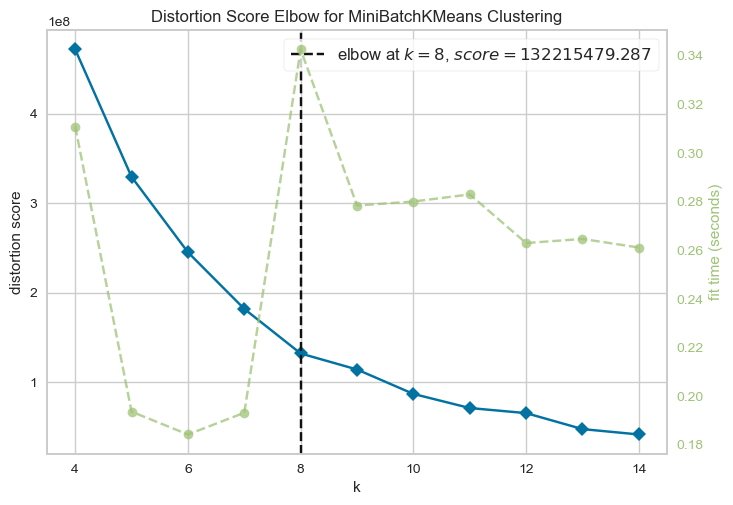

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
Evisualizer = KElbowVisualizer(MiniBatchKMeans(random_state=39, ), k=(4,15))
Evisualizer.fit(Xvivhog_bajo.drop(cols_muchos_nulos_bajo, axis=1))
Evisualizer.show()

**Silhouette**

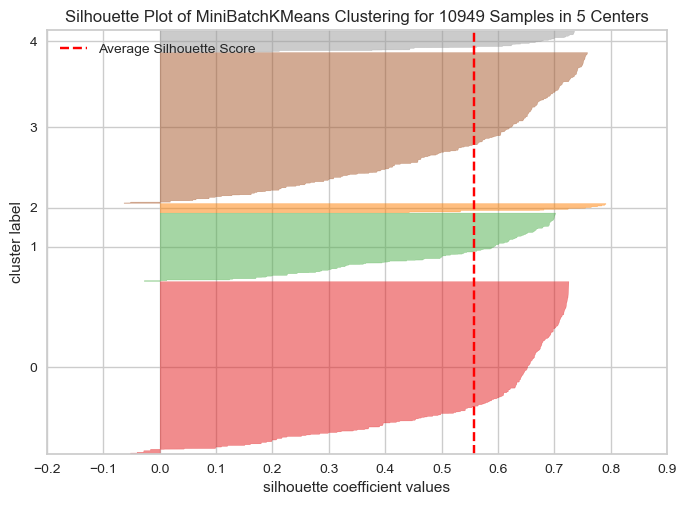

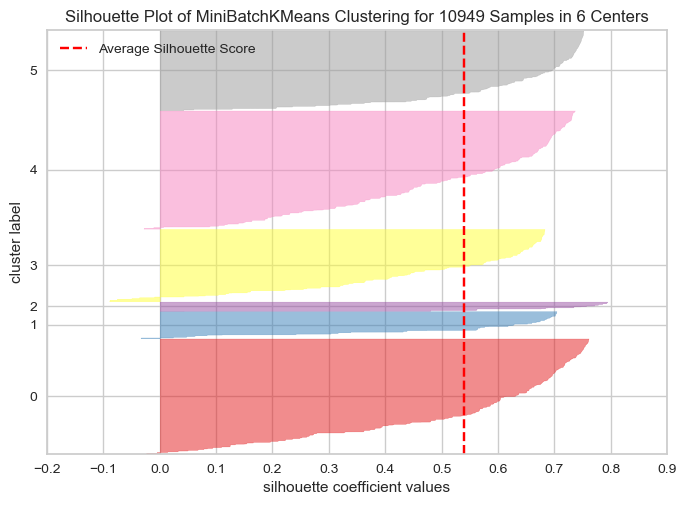

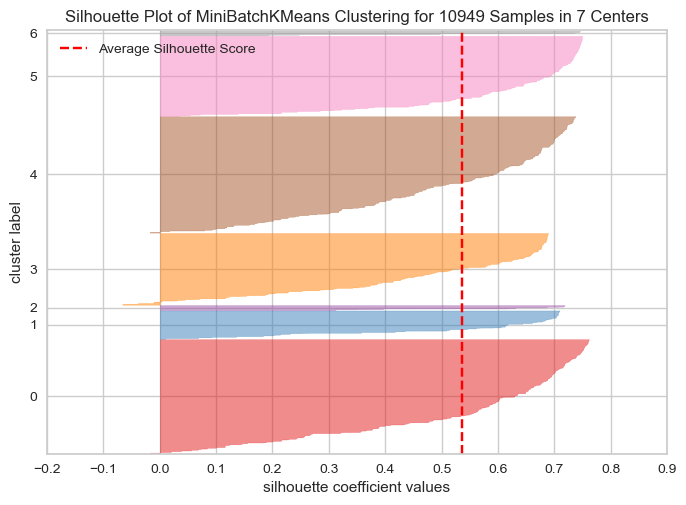

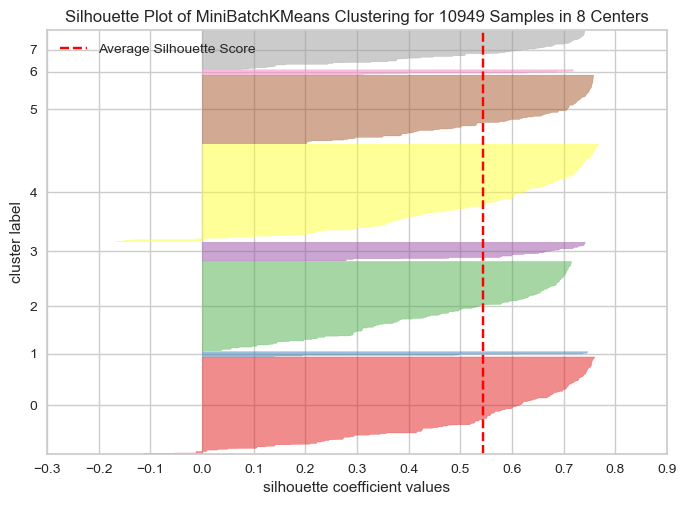

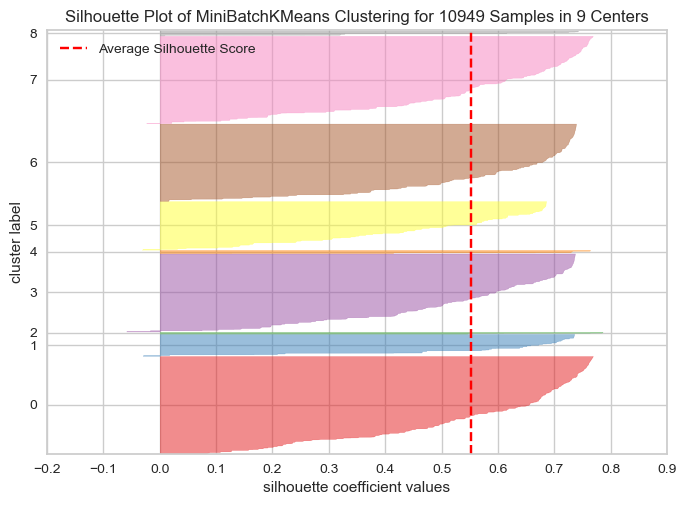

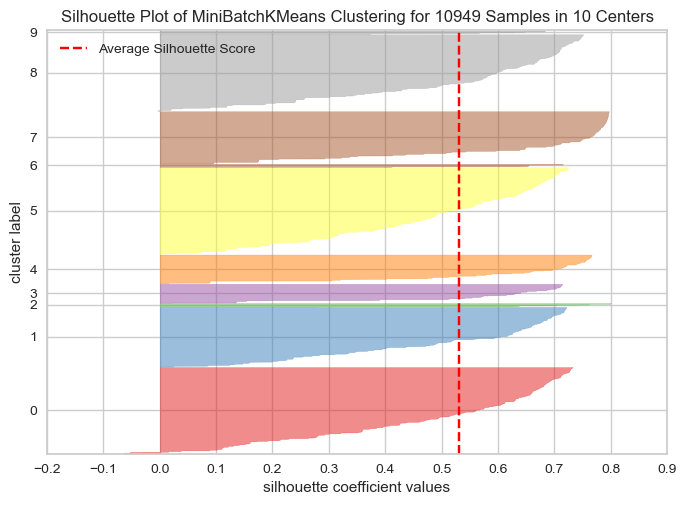

In [24]:
for k in range(5,11):
    svisualizer = SilhouetteVisualizer(MiniBatchKMeans(k, random_state=39))
    svisualizer.fit(Xvivhog_bajo.drop(cols_muchos_nulos_bajo, axis=1))        
    svisualizer.show()
     

#### Modelo

In [25]:
kModel = MiniBatchKMeans(5, random_state=13)

In [26]:
kModel.fit(Xvivhog_bajo.drop(cols_muchos_nulos_bajo, axis=1))

MiniBatchKMeans(n_clusters=5, random_state=13)

In [27]:
gruposkM_bajo = kModel.predict(Xvivhog_bajo.drop(cols_muchos_nulos_bajo, axis=1))
gruposkM_bajo

array([0, 0, 0, ..., 3, 3, 3])

##### Evaluacion

In [28]:
with config_context(target_offload="gpu:0"):
    print(eval_cluster(Xvivhog_bajo.drop(cols_muchos_nulos_bajo, axis=1),gruposkM_bajo))

{'calinski': 40137.09439546899, 'davies': 0.4854449457966349, 'silhoutte': 0.5437735446679408}


#### DBSCAN

In [29]:
dbModel =  DBSCAN(eps=0.7, min_samples=9, algorithm='auto', leaf_size=40, p=None, n_jobs=None)

In [30]:
gruposdb_bajo = dbModel.fit_predict(Xvivhog_bajo)
gruposdb_bajo

array([-1, -1, -1, ..., -1, -1, -1])

In [31]:
np.unique(gruposdb_bajo)

array([-1])

##### Evaluacion

In [ ]:
eval_cluster(Xvivhog_bajo, gruposdb_bajo)

#### Birch


##### Modelo

In [32]:
bModel = Birch(n_clusters=5)

In [33]:
with config_context(target_offload="gpu:0"):
    gruposbi_bajo = bModel.fit_predict(Xvivhog_bajo.drop(cols_muchos_nulos_bajo, axis=1))

##### Evaluacion

In [14]:
#eval_cluster(Xvivhog_bajo, gruposbi_bajo)

{'calinski': 8977.033192332463,
 'davies': 0.5421867587759372,
 'silhoutte': 0.529978018954827}

Resultado original con 7 grupos sin borrar cols con muchos nulos

{'calinski': 8977.033192332463,
 'davies': 0.5421867587759372,
 'silhoutte': 0.529978018954827}

In [34]:
eval_cluster(Xvivhog_bajo.drop(cols_muchos_nulos_bajo, axis=1), gruposbi_bajo)

{'calinski': 37508.07393212177,
 'davies': 0.49867612620106516,
 'silhoutte': 0.5335750598993111}

In [35]:
eval_cluster(Xvivhog_bajo, gruposbi_bajo)

{'calinski': 770.7107282758138,
 'davies': 1.492340148944611,
 'silhoutte': 0.23581702083946907}

#### OPTICS

##### Modelo

In [55]:
oModel = OPTICS(metric="euclidean", n_jobs=12)

In [56]:
with config_context(target_offload="gpu:0"):
    gruposo_bajo = oModel.fit_predict(Xvivhog_bajo)

#### Evaluacion

In [57]:
eval_cluster(Xvivhog_bajo,gruposo_bajo)

{'calinski': 26.355836586913004,
 'davies': 1.7167334290367713,
 'silhoutte': -0.09605806070843612}

## Medio Bajo

In [10]:
Xvivhog_mbajo = Xvivhog[Xvivhog.ESTRATO==2]
Xvivhog_mbajo

P1_1  P1_2  P1_3  P1_4  P1_5_1  P1_5_2  P1_5_3  P2_1  P2_2  P2_3  ...  \
29        3     1     1     1       1       2       2     1     1   0.0  ...   
30        3     1     1     1       1       1       1     7     1   0.0  ...   
31        2     1     1     1       1       1       1     3     1   0.0  ...   
32        2     1     1     1       1       1       1     5     1   0.0  ...   
33        2     1     1     1       1       1       2     5     1   0.0  ...   
...     ...   ...   ...   ...     ...     ...     ...   ...   ...   ...  ...   
58149     2     1     1     1       1       1       1     7     1   0.0  ...   
58150     2     1     1     1       1       1       1     6     2   2.0  ...   
58151     2     1     1     1       1       1       1     6     2   2.0  ...   
58152     3     1     1     1       1       1       1     6     1   0.0  ...   
58153     2     1     1     1       1       1       2     2     1   0.0  ...   

       P5_8_7  P5_7_8  P5_8_8  P5_11_1  P5_11_2  P5_11_3  FAC_HOG  DOMINIO  \
29        0.0     2.0     0.0      3.0      3.0      3.0      557        1   
30        0.0     2.0     0.0      1.0      1.0      1.0      557        1   
31        0.0     2.0     0.0      2.0      8.0      3.0      557        1   
32        0.0     2.0     0.0      1.0      1.0      1.0      557        1   
33        0.0     2.0     0.0      1.0      1.0      3.0      557        1   
...       ...     ...     ...      ...      ...      ...      ...      ...   
58149   300.0     2.0     0.0      3.0      3.0      1.0      199        0   
58150    20.0     1.0   200.0      1.0      3.0      1.0      199        0   
58151     0.0     1.0   300.0      1.0      1.0      3.0      199        0   
58152     0.0     1.0     0.0      1.0      3.0      3.0      199        0   
58153   610.0     2.0     0.0      3.0      1.0      1.0      199        0   

       TLOC  ESTRATO  
29        1        2  
30        1        2  
31        1        2  
32        1        2  
33        1        2  
...     ...      ...  
58149     4        2  
58150     4        2  
58151     4        2  
58152     4        2  
58153     4        2  

[30203 rows x 73 columns]

### Métodos agrupamiento 

#### K Means

##### Selección de K

**Codo**

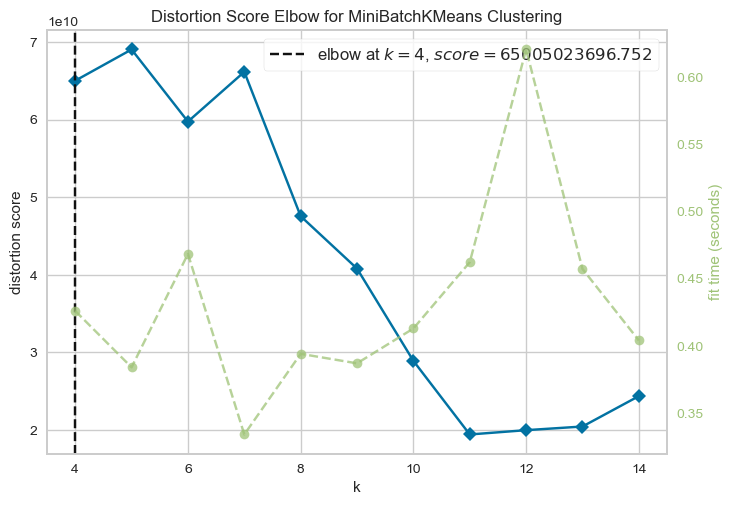

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
Evisualizer = KElbowVisualizer(MiniBatchKMeans(random_state=39, ), k=(4,15))
Evisualizer.fit(Xvivhog_mbajo)
Evisualizer.show()

**Silhouette**

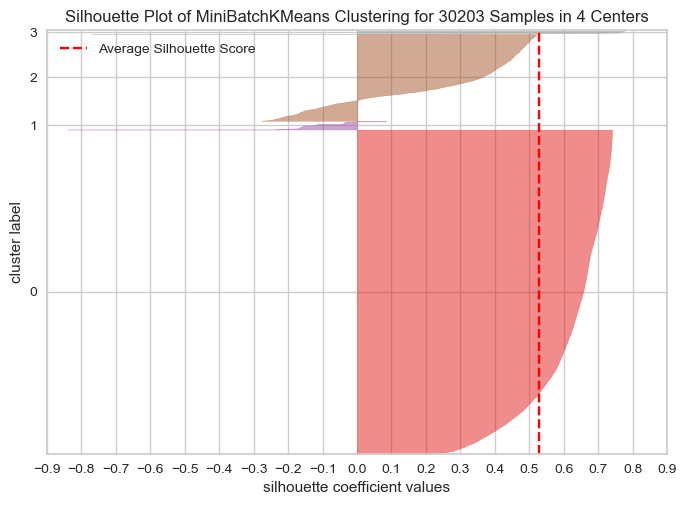

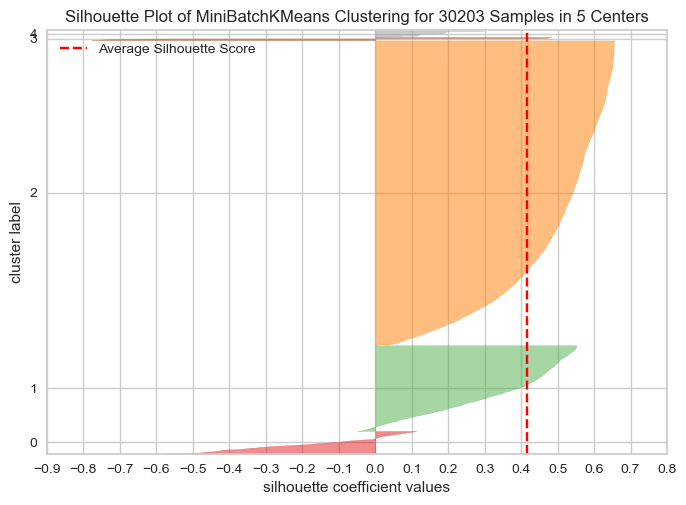

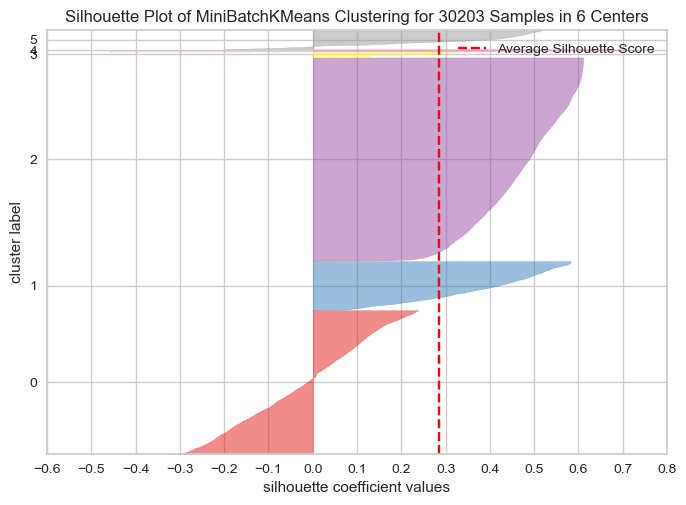

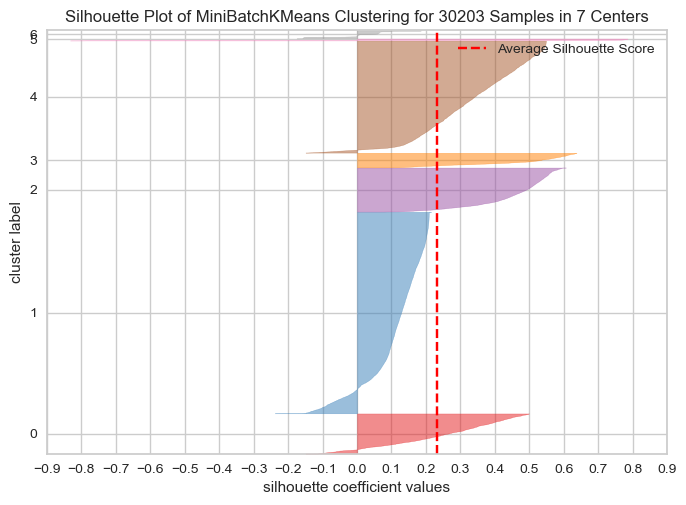

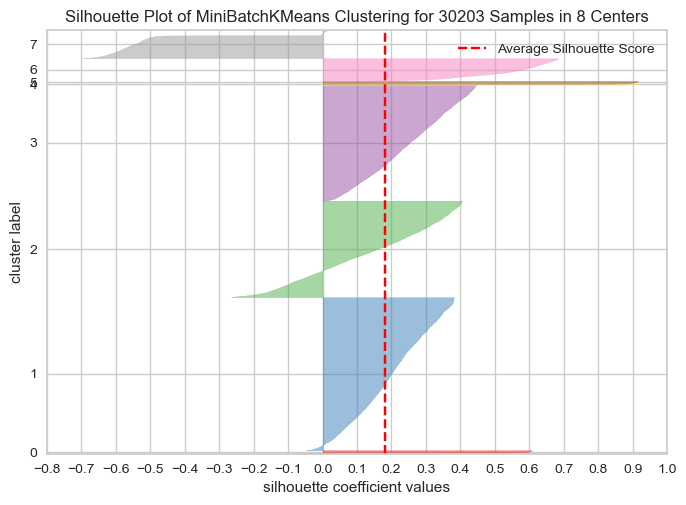

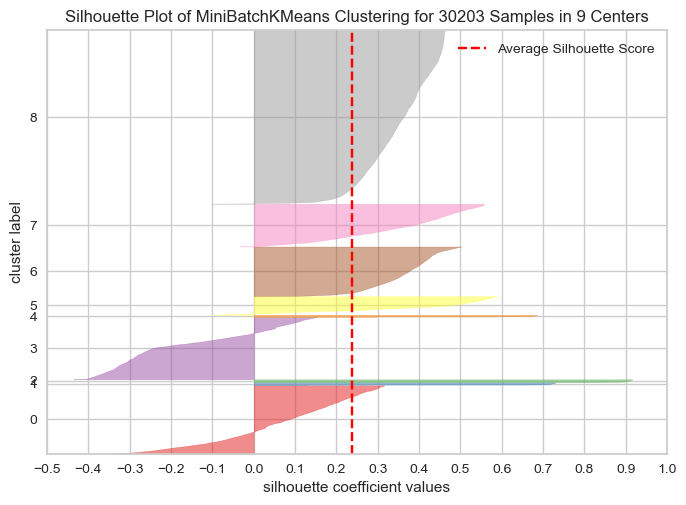

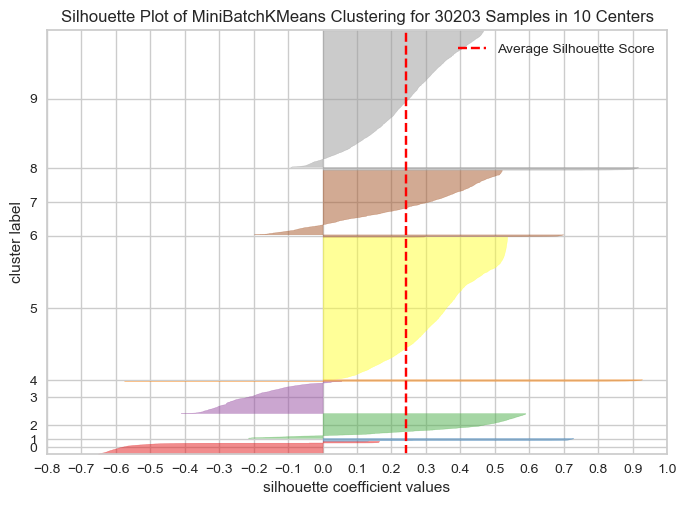

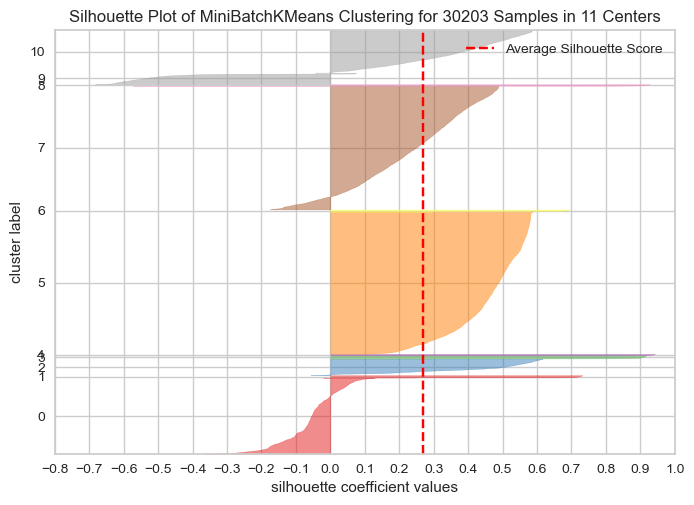

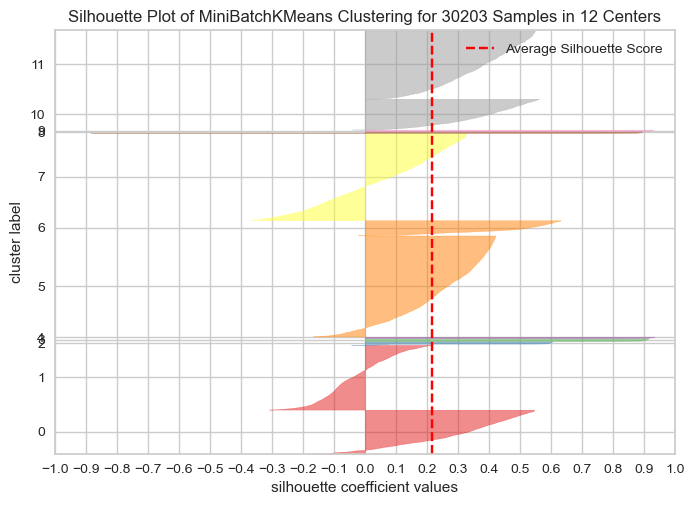

In [60]:
for k in range(4,13):
    svisualizer = SilhouetteVisualizer(MiniBatchKMeans(k, random_state=39))
    svisualizer.fit(Xvivhog_mbajo)        
    svisualizer.show()
     

#### Modelo

In [16]:
kModel = MiniBatchKMeans(4, random_state=13)

In [17]:
kModel.fit(Xvivhog_mbajo)

MiniBatchKMeans(n_clusters=4, random_state=13)

In [63]:
gruposkM_mbajo = kModel.predict(Xvivhog_mbajo)
gruposkM_mbajo

array([1, 1, 1, ..., 1, 1, 1])

##### Evaluacion

In [64]:
with config_context(target_offload="gpu:0"):
    print(eval_cluster(Xvivhog_mbajo,gruposkM_mbajo))

{'calinski': 9465.80212213684, 'davies': 0.9383348632628241, 'silhoutte': 0.5810934512939329}


#### DBSCAN

In [71]:
dbModel =  DBSCAN(eps=0.01, min_samples=9, algorithm='auto', leaf_size=40, p=None, n_jobs=None)

In [72]:
gruposdb_mbajo = dbModel.fit_predict(Xvivhog_mbajo)
gruposdb_mbajo

array([-1, -1, -1, ..., -1, -1, -1])

In [73]:
np.unique(gruposdb_bajo)

array([-1])

##### Evaluacion

In [ ]:
eval_cluster(Xvivhog_mbajo, gruposdb_mbajo)

#### Birch


##### Modelo

In [11]:
bModel = Birch(n_clusters=4)

In [12]:
with config_context(target_offload="gpu:0"):
    gruposbi_mbajo = bModel.fit_predict(Xvivhog_mbajo)

##### Evaluacion

In [13]:
eval_cluster(Xvivhog_mbajo, gruposbi_mbajo)

{'calinski': 9446.659288330118,
 'davies': 0.4525714171654283,
 'silhoutte': 0.8902307147662779}

#### OPTICS

##### Modelo

In [77]:
oModel = OPTICS(metric="euclidean", n_jobs=12)

In [78]:
with config_context(target_offload="gpu:0"):
    gruposo_mbajo = oModel.fit_predict(Xvivhog_mbajo)

##### Evaluacion

In [79]:
eval_cluster(Xvivhog_mbajo,gruposo_mbajo)

{'calinski': 27.248061462442212,
 'davies': 1.6529557147638383,
 'silhoutte': -0.2501934760056571}

## Medio Alto

In [14]:
Xvivhog_malto = Xvivhog[Xvivhog.ESTRATO==3]
Xvivhog_malto

P1_1  P1_2  P1_3  P1_4  P1_5_1  P1_5_2  P1_5_3  P2_1  P2_2  P2_3  ...  \
0         2     2     1     1       1       2       1     4     1   0.0  ...   
1         3     1     1     1       1       1       1     1     1   0.0  ...   
2         2     1     1     1       1       1       1     5     1   0.0  ...   
12        2     1     1     1       1       1       1     4     1   0.0  ...   
13        3     1     1     1       1       1       1     3     1   0.0  ...   
...     ...   ...   ...   ...     ...     ...     ...   ...   ...   ...  ...   
58076     2     1     1     1       1       1       2     6     1   0.0  ...   
58077     3     1     1     1       1       1       1     5     1   0.0  ...   
58078     3     1     1     1       1       1       2     4     1   0.0  ...   
58079     2     1     1     1       1       1       1     2     1   0.0  ...   
58080     2     1     1     2       2       2       2     3     1   0.0  ...   

       P5_8_7  P5_7_8  P5_8_8  P5_11_1  P5_11_2  P5_11_3  FAC_HOG  DOMINIO  \
0         0.0     2.0     0.0      3.0      3.0      3.0      596        1   
1         0.0     2.0     0.0      1.0      1.0      3.0      596        1   
2         0.0     2.0     0.0      1.0      3.0      1.0      596        1   
12        0.0     2.0     0.0      1.0      3.0      1.0      678        1   
13        0.0     2.0     0.0      1.0      1.0      1.0      678        1   
...       ...     ...     ...      ...      ...      ...      ...      ...   
58076     0.0     1.0   500.0      1.0      3.0      3.0      192        1   
58077     0.0     2.0     0.0      2.0      1.0      1.0      192        1   
58078     0.0     1.0   240.0      1.0      1.0      3.0      192        1   
58079     0.0     2.0     0.0      3.0      3.0      3.0      192        1   
58080     0.0     2.0     0.0      3.0      3.0      3.0      192        1   

       TLOC  ESTRATO  
0         1        3  
1         1        3  
2         1        3  
12        1        3  
13        1        3  
...     ...      ...  
58076     2        3  
58077     2        3  
58078     2        3  
58079     2        3  
58080     2        3  

[12057 rows x 73 columns]

### Métodos agrupamiento 

#### K Means

##### Selección de K

**Codo**

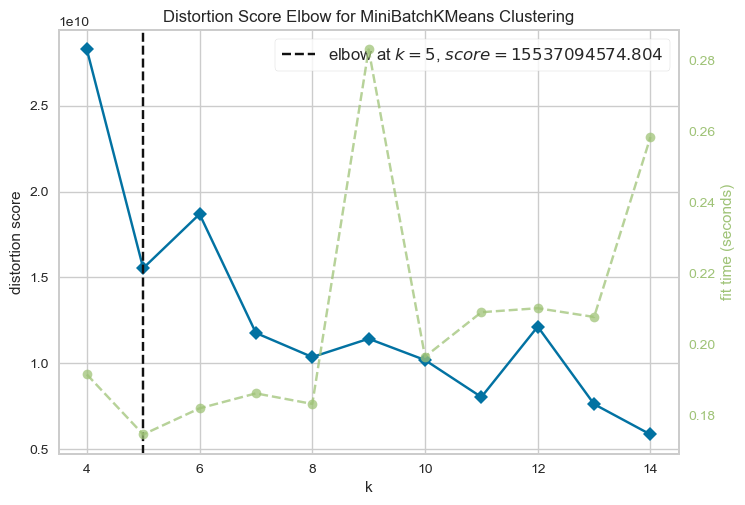

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
Evisualizer = KElbowVisualizer(MiniBatchKMeans(random_state=39, ), k=(4,15))
Evisualizer.fit(Xvivhog_malto)
Evisualizer.show()

**Silhouette**

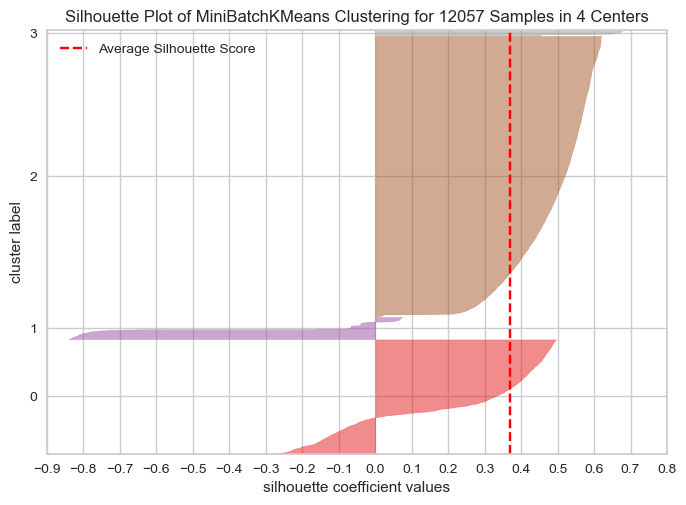

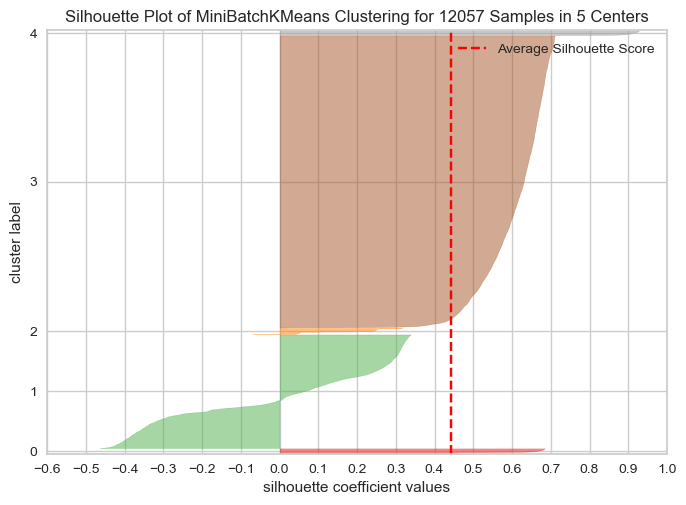

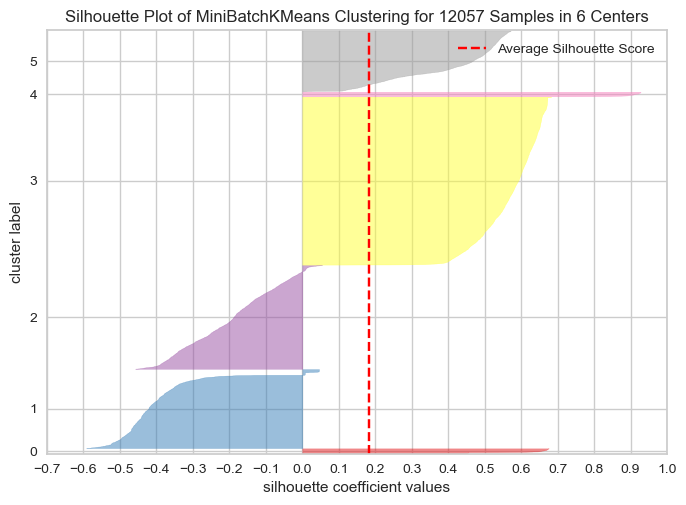

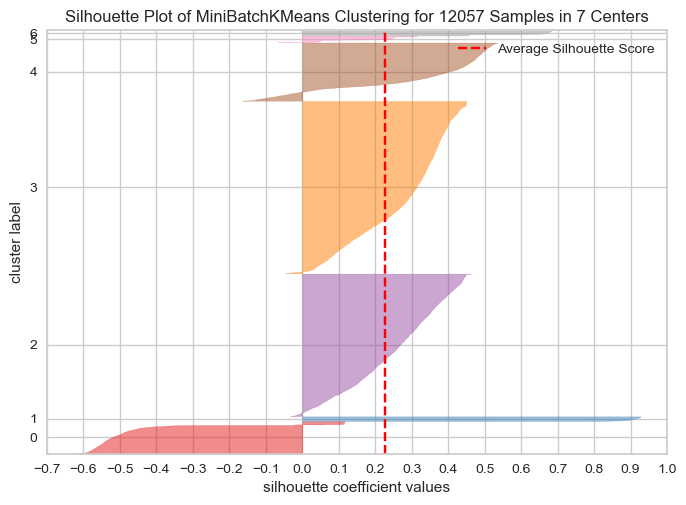

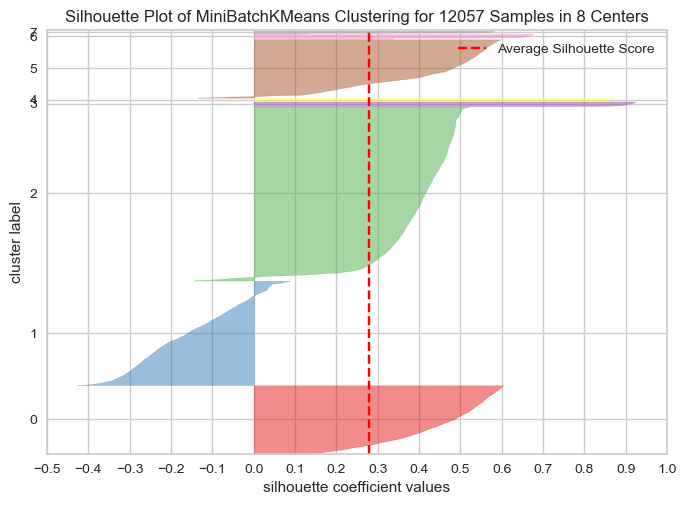

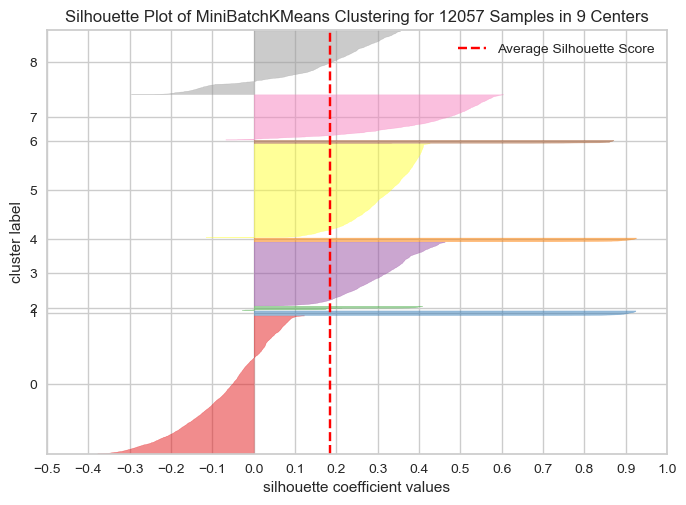

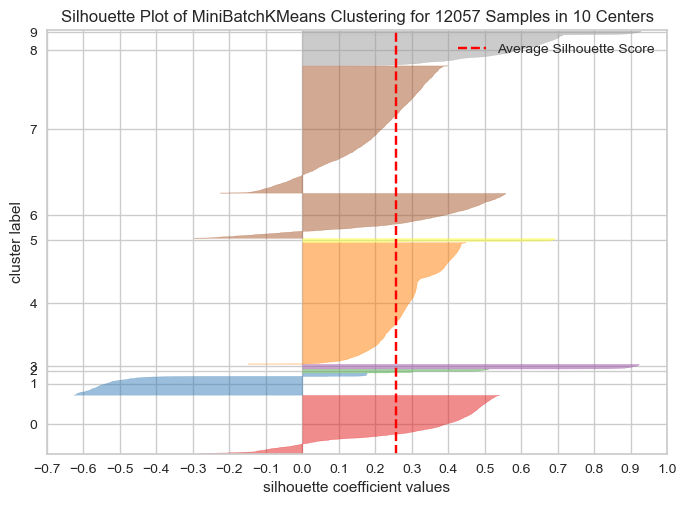

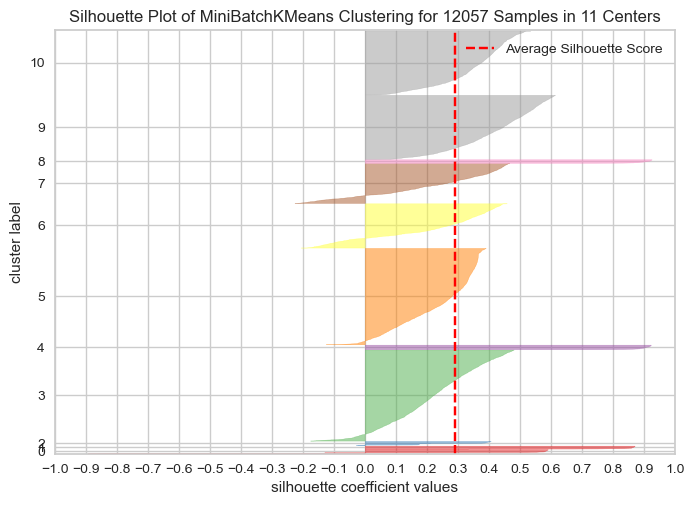

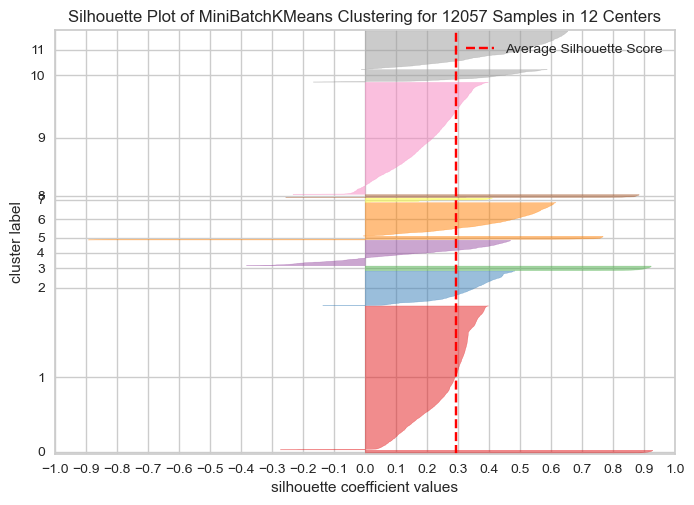

In [82]:
for k in range(4,13):
    svisualizer = SilhouetteVisualizer(MiniBatchKMeans(k, random_state=39))
    svisualizer.fit(Xvivhog_malto)        
    svisualizer.show()
     

#### Modelo

In [83]:
kModel = MiniBatchKMeans(5, random_state=13)

In [84]:
kModel.fit(Xvivhog_malto)

MiniBatchKMeans(n_clusters=5, random_state=13)

In [85]:
gruposkM_malto = kModel.predict(Xvivhog_malto)
gruposkM_malto

array([0, 0, 0, ..., 2, 2, 2])

##### Evaluacion

In [86]:
with config_context(target_offload="gpu:0"):
    print(eval_cluster(Xvivhog_malto,gruposkM_malto))

{'calinski': 2319.9387945430635, 'davies': 1.4262938215719296, 'silhoutte': 0.13252062365055514}


#### DBSCAN

In [87]:
dbModel =  DBSCAN(eps=0.7, min_samples=9, algorithm='auto', leaf_size=40, p=None, n_jobs=None)

In [88]:
gruposdb_malto = dbModel.fit_predict(Xvivhog_malto)
gruposdb_malto

array([-1, -1, -1, ..., -1, -1, -1])

In [89]:
np.unique(gruposdb_malto)

array([-1])

##### Evaluacion

In [ ]:
#eval_cluster(Xvivhog_bajo, gruposdb_bajo)

#### Birch


##### Modelo

In [15]:
bModel = Birch(n_clusters=5)

In [16]:
with config_context(target_offload="gpu:0"):
    gruposbi_malto = bModel.fit_predict(Xvivhog_malto)

##### Evaluacion

In [17]:
eval_cluster(Xvivhog_malto, gruposbi_malto)

{'calinski': 4680.191138515215,
 'davies': 0.9639118293491377,
 'silhoutte': 0.8767791116934949}

#### OPTICS

##### Modelo

In [93]:
oModel = OPTICS(metric="euclidean", n_jobs=12)

In [94]:
with config_context(target_offload="gpu:0"):
    gruposo_malto = oModel.fit_predict(Xvivhog_malto)

##### Evaluacion

In [95]:
eval_cluster(Xvivhog_malto,gruposo_malto)

{'calinski': 27.220906837856067,
 'davies': 1.6989195267453958,
 'silhoutte': -0.18459256834136814}

## Alto

In [18]:
Xvivhog_alto = Xvivhog[Xvivhog.ESTRATO==4]
Xvivhog_alto

P1_1  P1_2  P1_3  P1_4  P1_5_1  P1_5_2  P1_5_3  P2_1  P2_2  P2_3  ...  \
3         2     1     1     1       1       1       1     6     1   0.0  ...   
4         3     1     1     1       1       1       1     4     1   0.0  ...   
5         3     1     1     1       1       1       1     5     1   0.0  ...   
6         2     1     1     1       1       2       2     6     1   0.0  ...   
7         2     1     1     1       1       1       1     3     1   0.0  ...   
...     ...   ...   ...   ...     ...     ...     ...   ...   ...   ...  ...   
57178     3     1     1     1       1       1       1     3     1   0.0  ...   
57179     3     1     1     1       1       1       1     4     1   0.0  ...   
57180     3     1     1     1       1       1       1     5     1   0.0  ...   
57181     3     1     1     1       1       1       1     3     1   0.0  ...   
57182     3     1     1     1       1       1       1     1     1   0.0  ...   

       P5_8_7  P5_7_8  P5_8_8  P5_11_1  P5_11_2  P5_11_3  FAC_HOG  DOMINIO  \
3         0.0     2.0     0.0      1.0      1.0      1.0      692        1   
4         0.0     2.0     0.0      1.0      1.0      1.0      692        1   
5         0.0     1.0   350.0      1.0      3.0      3.0      692        1   
6         0.0     2.0     0.0      1.0      3.0      2.0      692        1   
7         0.0     2.0     0.0      1.0      1.0      3.0      692        1   
...       ...     ...     ...      ...      ...      ...      ...      ...   
57178     0.0     2.0     0.0      2.0      1.0      3.0      271        1   
57179     0.0     2.0     0.0      2.0      2.0      3.0      271        1   
57180     0.0     2.0     0.0      2.0      1.0      3.0      271        1   
57181     0.0     2.0     0.0      1.0      1.0      1.0      271        1   
57182     0.0     2.0     0.0      1.0      3.0      1.0      271        1   

       TLOC  ESTRATO  
3         1        4  
4         1        4  
5         1        4  
6         1        4  
7         1        4  
...     ...      ...  
57178     1        4  
57179     1        4  
57180     1        4  
57181     1        4  
57182     1        4  

[4945 rows x 73 columns]

### Métodos agrupamiento 

#### K Means

##### Selección de K

**Codo**

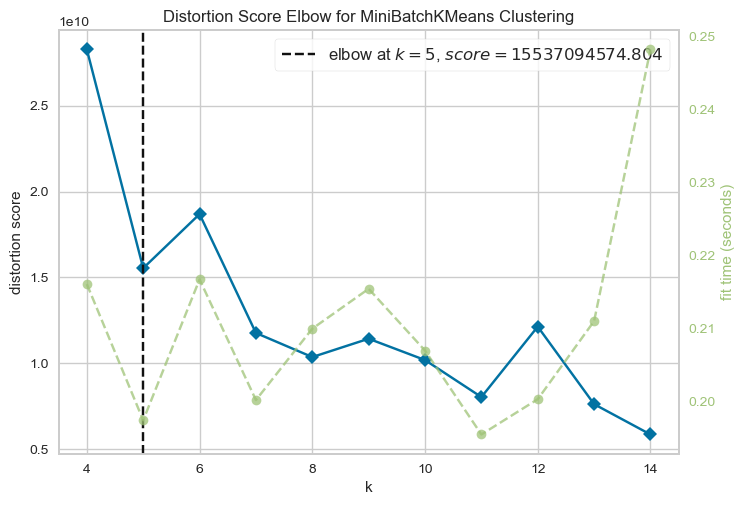

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
Evisualizer = KElbowVisualizer(MiniBatchKMeans(random_state=39, ), k=(4,15))
Evisualizer.fit(Xvivhog_alto)
Evisualizer.show()

**Silhouette**

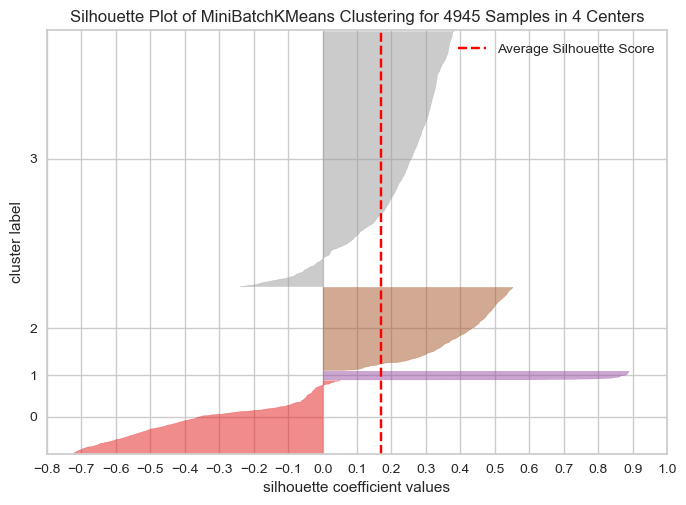

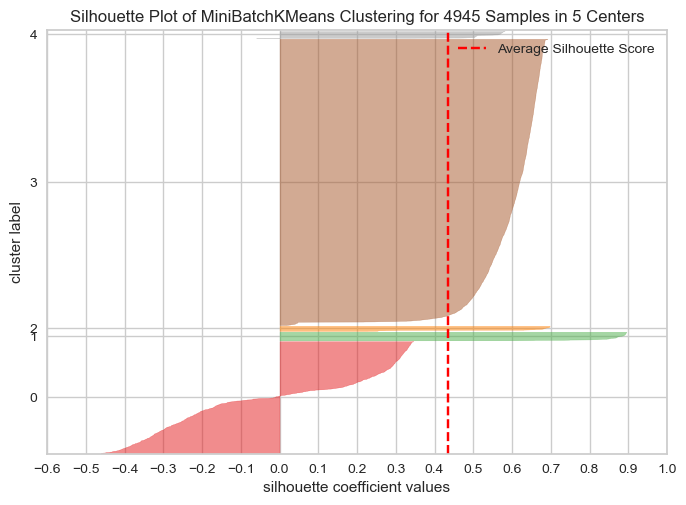

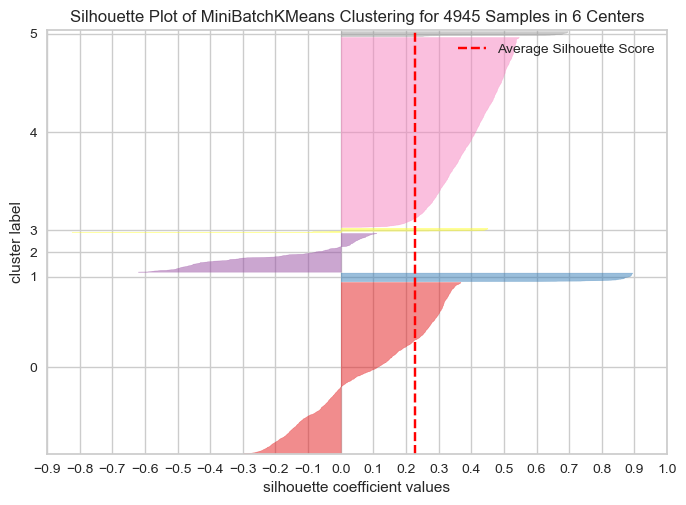

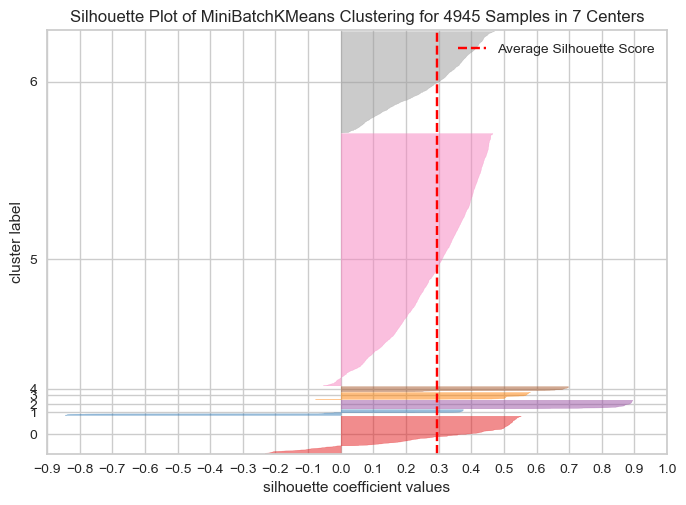

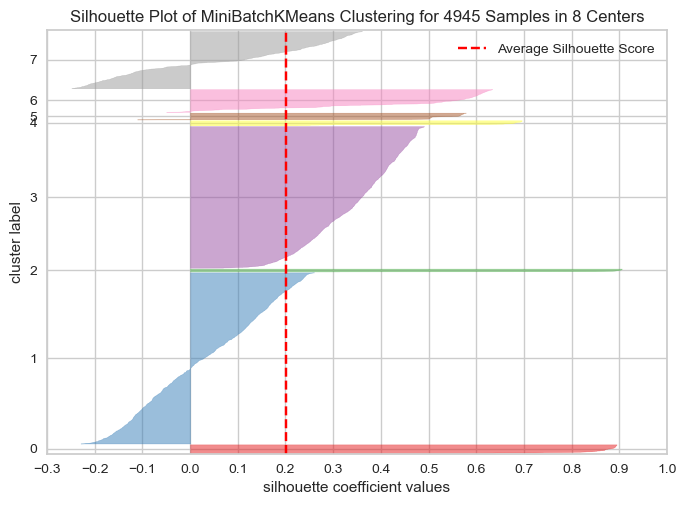

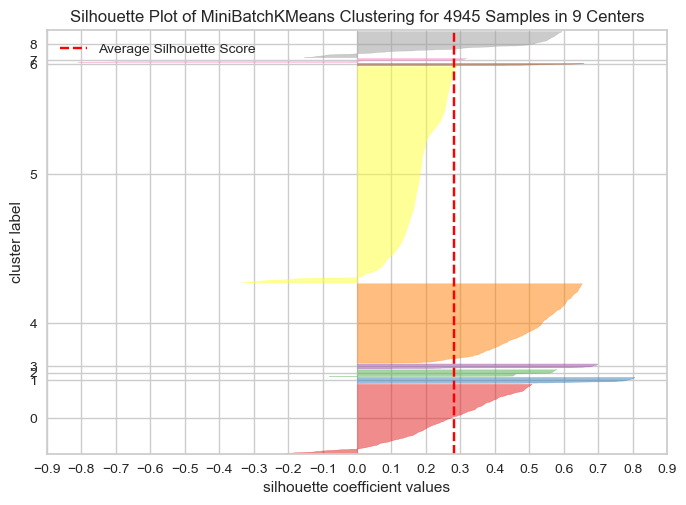

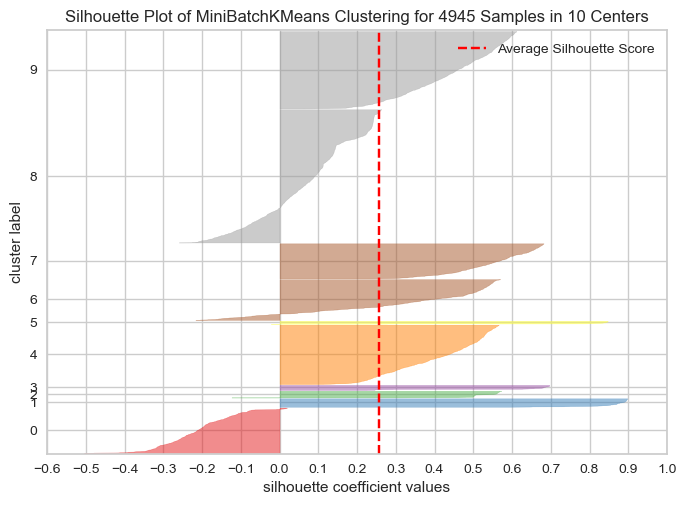

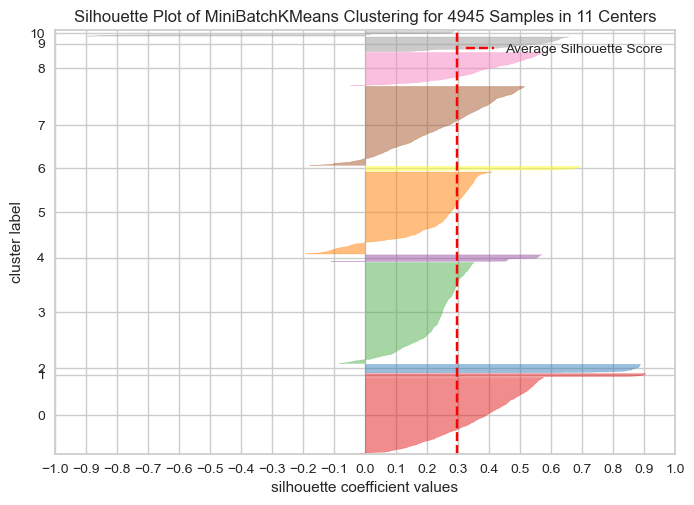

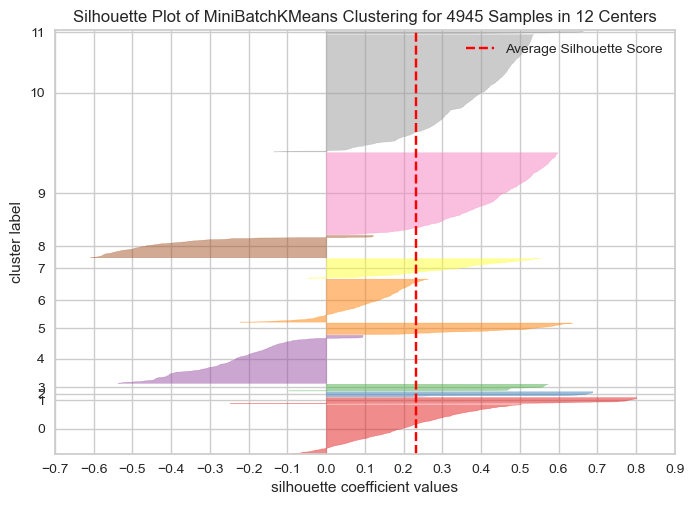

In [98]:
for k in range(4,13):
    svisualizer = SilhouetteVisualizer(MiniBatchKMeans(k, random_state=39))
    svisualizer.fit(Xvivhog_alto)        
    svisualizer.show()
     

#### Modelo

In [99]:
kModel = MiniBatchKMeans(5, random_state=13)

In [100]:
kModel.fit(Xvivhog_alto)

MiniBatchKMeans(n_clusters=5, random_state=13)

In [101]:
gruposkM_alto = kModel.predict(Xvivhog_alto)
gruposkM_alto

array([3, 3, 0, ..., 3, 3, 3])

##### Evaluacion

In [102]:
with config_context(target_offload="gpu:0"):
    print(eval_cluster(Xvivhog_alto,gruposkM_alto))

{'calinski': 1400.7807459860765, 'davies': 1.4244555766170264, 'silhoutte': 0.38586927508500507}


#### DBSCAN

In [ ]:
dbModel =  DBSCAN(eps=0.7, min_samples=9, algorithm='auto', leaf_size=40, p=None, n_jobs=None)

In [103]:
gruposdb_alto = dbModel.fit_predict(Xvivhog_alto)
gruposdb_alto

array([-1, -1, -1, ..., -1, -1, -1])

In [104]:
np.unique(gruposdb_alto)

array([-1])

##### Evaluacion

In [ ]:
#eval_cluster(Xvivhog_bajo, gruposdb_bajo)

#### Birch


##### Modelo

In [19]:
bModel = Birch(n_clusters=5)

In [20]:
with config_context(target_offload="gpu:0"):
    gruposbi_alto = bModel.fit_predict(Xvivhog_alto)

##### Evaluacion

In [21]:
eval_cluster(Xvivhog_alto, gruposbi_alto)

{'calinski': 2007.2471559908222,
 'davies': 0.8675384943446034,
 'silhoutte': 0.8475631837298431}

#### OPTICS

##### Modelo

In [108]:
oModel = OPTICS(metric="euclidean", n_jobs=12)

In [109]:
with config_context(target_offload="gpu:0"):
    gruposo_alto = oModel.fit_predict(Xvivhog_alto)

#### Evaluacion

In [110]:
eval_cluster(Xvivhog_alto,gruposo_alto)

{'calinski': 20.4675329381671,
 'davies': 1.857610467277014,
 'silhoutte': -0.13087191255039404}

## General

In [25]:
Xvivhog_bajo["Grupo"] = Xvivhog_bajo.ESTRATO #(Xvivhog_bajo.ESTRATO.apply(lambda x: str(x)) + gruposbi_bajo.astype(str)).astype(int)
Xvivhog_mbajo["Grupo"] = (Xvivhog_mbajo.ESTRATO.apply(lambda x: str(x)) + gruposbi_mbajo.astype(str)).astype(int)
Xvivhog_malto["Grupo"] = (Xvivhog_malto.ESTRATO.apply(lambda x: str(x)) + gruposbi_malto.astype(str)).astype(int)
Xvivhog_alto["Grupo"] = (Xvivhog_alto.ESTRATO.apply(lambda x: str(x)) + gruposbi_alto.astype(str)).astype(int)


In [28]:
Xvivhog_gral = pd.concat([Xvivhog_bajo, Xvivhog_mbajo, Xvivhog_malto, Xvivhog_alto])
Xvivhog_gral

P1_1  P1_2  P1_3  P1_4  P1_5_1  P1_5_2  P1_5_3  P2_1  P2_2  P2_3  ...  \
29        3     1     1     1       1       2       2     1     1   0.0  ...   
30        3     1     1     1       1       1       1     7     1   0.0  ...   
31        2     1     1     1       1       1       1     3     1   0.0  ...   
32        2     1     1     1       1       1       1     5     1   0.0  ...   
33        2     1     1     1       1       1       2     5     1   0.0  ...   
...     ...   ...   ...   ...     ...     ...     ...   ...   ...   ...  ...   
57178     3     1     1     1       1       1       1     3     1   0.0  ...   
57179     3     1     1     1       1       1       1     4     1   0.0  ...   
57180     3     1     1     1       1       1       1     5     1   0.0  ...   
57181     3     1     1     1       1       1       1     3     1   0.0  ...   
57182     3     1     1     1       1       1       1     1     1   0.0  ...   

       P5_7_8  P5_8_8  P5_11_1  P5_11_2  P5_11_3  FAC_HOG  DOMINIO  TLOC  \
29        2.0     0.0      3.0      3.0      3.0      557        1     1   
30        2.0     0.0      1.0      1.0      1.0      557        1     1   
31        2.0     0.0      2.0      8.0      3.0      557        1     1   
32        2.0     0.0      1.0      1.0      1.0      557        1     1   
33        2.0     0.0      1.0      1.0      3.0      557        1     1   
...       ...     ...      ...      ...      ...      ...      ...   ...   
57178     2.0     0.0      2.0      1.0      3.0      271        1     1   
57179     2.0     0.0      2.0      2.0      3.0      271        1     1   
57180     2.0     0.0      2.0      1.0      3.0      271        1     1   
57181     2.0     0.0      1.0      1.0      1.0      271        1     1   
57182     2.0     0.0      1.0      3.0      1.0      271        1     1   

       ESTRATO  Grupo  
29           2     20  
30           2     20  
31           2     20  
32           2     20  
33           2     20  
...        ...    ...  
57178        4     42  
57179        4     42  
57180        4     42  
57181        4     42  
57182        4     42  

[47205 rows x 74 columns]

## Evaluación

In [29]:
eval_cluster(Xvivhog_gral.drop("Grupo", axis=1), Xvivhog_gral.Grupo)

{'calinski': 4440.952279311841,
 'davies': 9.487392282652893,
 'silhoutte': -0.020296116709399858}